In [296]:

pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [298]:

pip install pandas_ta

Note: you may need to restart the kernel to use updated packages.


In [300]:
df['garman_klass_vol'] = ((np.log(df['high'])-np.log(df['low']))**2)/2-(2*np.log(2)-1)*((np.log(df['adj close'])-np.log(df['open']))**2)
df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close =x, length =20))
#df.xs('AAPL', level = 1)['rsi'].plot()
df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,0])                                                         
df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,1])                                                          
df['bb_high'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,2])
def compute_atr(stock_data):
    atr = pandas_ta.atr(high=stock_data['high'],
                        low=stock_data['low'],
                        close=stock_data['close'],
                        length=14)
    return atr.sub(atr.mean()).div(atr.std())

df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr)
def compute_macd(close):
    macd = pandas_ta.macd(close=close, length=20).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())

df['macd'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_macd)
df['dollar_volume'] = (df['adj close']*df['volume'])/1e6

df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.425222   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361626   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.651131   27.264999   28.377501   26.965000   28.207500   
           ABBV     36.004150   52.790001   54.189999   51.880001   53.099998   
           ABT      33.302025   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 XYL      88.736305   89.519997   90.849998   89.500000   90.379997   
           YUM     122.211006  124.010002  124.739998  123.449997  124.239998   
           ZBH     111.534821  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZTS     175.131119  176.869995  178.449997  176.270004  176.580002   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2015-09-29 A         2252400.0         -0.001082        NaN       NaN   
           AAL       7478800.0         -0.000443        NaN       NaN   
           AAPL    293461600.0         -0.005712        NaN       NaN   
           ABBV     12842800.0         -0.057368        NaN       NaN   
           ABT      12287500.0         -0.010064        NaN       NaN   
...                        ...               ...        ...       ...   
2023-09-26 XYL       1322400.0         -0.000018  26.146735  4.485761   
           YUM       1500600.0         -0.000051  36.057180  4.811707   
           ZBH       3610500.0          0.000022  31.893231  4.745884   
           ZBRA       355400.0          0.000133  29.494977  5.400991   
           ZTS       1463200.0          0.000049  42.623458  5.153746   

Price                bb_mid   bb_high       atr      macd  dollar_volume  
date       ticker                                                         
2015-09-29 A            NaN       NaN       NaN       NaN      70.782171  
           AAL          NaN       NaN       NaN       NaN     279.420126  
           AAPL         NaN       NaN       NaN       NaN    7234.160250  
           ABBV         NaN       NaN       NaN       NaN     462.394103  
           ABT          NaN       NaN       NaN       NaN     409.198630  
...                     ...       ...       ...       ...            ...  
2023-09-26 XYL     4.567684  4.649607  0.033800 -2.159188     117.344890  
           YUM     4.841672  4.871637  0.142547 -1.363696     183.389836  
           ZBH     4.785551  4.825217 -0.381708 -0.881067     402.696470  
           ZBRA    5.539167  5.677342 -0.057389 -1.600791      79.595386  
           ZTS     5.212559  5.271371  0.651515 -1.188279     256.251853  

[985955 rows x 14 columns]

In [55]:
last_cols = [c for c in df.columns.unique(0) if c not in ['dollar_volume', 'volume', 'high', 'close', 'open', 'low']]

#last_cols

#df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume')

['adj close',
 'garman_klass_vol',
 'rsi',
 'bb_low',
 'bb_mid',
 'bb_high',
 'atr',
 'macd']

In [302]:
df.unstack()[last_cols].resample('M').last().stack('ticker')

Price               adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2015-09-30 A        31.974758         -0.001321        NaN       NaN   
           AAL      37.027859          0.000050        NaN       NaN   
           AAPL     24.931414         -0.003507        NaN       NaN   
           ABBV     37.109039         -0.051684        NaN       NaN   
           ABT      33.909058         -0.009795        NaN       NaN   
...                       ...               ...        ...       ...   
2023-09-30 XYL      88.736305         -0.000018  26.146735  4.485761   
           YUM     122.211006         -0.000051  36.057180  4.811707   
           ZBH     111.534821          0.000022  31.893231  4.745884   
           ZBRA    223.960007          0.000133  29.494977  5.400991   
           ZTS     175.131119          0.000049  42.623458  5.153746   

Price                bb_mid   bb_high       atr      macd  
date       ticker                                          
2015-09-30 A            NaN       NaN       NaN       NaN  
           AAL          NaN       NaN       NaN       NaN  
           AAPL         NaN       NaN       NaN       NaN  
           ABBV         NaN       NaN       NaN       NaN  
           ABT          NaN       NaN       NaN       NaN  
...                     ...       ...       ...       ...  
2023-09-30 XYL     4.567684  4.649607  0.033800 -2.159188  
           YUM     4.841672  4.871637  0.142547 -1.363696  
           ZBH     4.785551  4.825217 -0.381708 -0.881067  
           ZBRA    5.539167  5.677342 -0.057389 -1.600791  
           ZTS     5.212559  5.271371  0.651515 -1.188279  

[47531 rows x 8 columns]

In [487]:
data = (pd.concat([df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume'),
                   df.unstack()[last_cols].resample('M').last().stack('ticker')],
                 axis=1)).dropna()

data

dollar_volume   adj close  garman_klass_vol        rsi  \
date       ticker                                                           
2015-11-30 A          135.740922   38.950897         -0.002098  73.421502   
           AAL        287.915798   39.429932         -0.000966  40.718985   
           AAPL      4023.984010   26.854136         -0.003307  55.537320   
           ABBV       334.491190   40.025848         -0.062372  49.376900   
           ABT        210.542058   38.091473         -0.011927  56.962443   
...                          ...         ...               ...        ...   
2023-09-30 OTIS       154.361755   78.356506         -0.000097  33.116283   
           ABNB      1633.500725  132.279999          0.000213  44.494127   
           CEG        196.670369  107.862030          0.000131  55.245482   
           GEHC       212.197215   66.105721          0.000185  40.922328   
           KVUE       670.804304   20.006193         -0.000159  35.706319   

                     bb_low    bb_mid   bb_high       atr      macd  
date       ticker                                                    
2015-11-30 A       3.544191  3.616636  3.689081 -1.033887  0.567158  
           AAL     3.672028  3.749832  3.827636  0.190822 -0.418772  
           AAPL    3.281679  3.324991  3.368302 -0.967900 -0.142790  
           ABBV    3.717771  3.766009  3.814247 -0.526809  0.145677  
           ABT     3.650901  3.672752  3.694603 -1.064842  0.335557  
...                     ...       ...       ...       ...       ...  
2023-09-30 OTIS    4.370137  4.415425  4.460712 -1.028320 -1.534535  
           ABNB    4.857047  4.940924  5.024801 -1.006939 -0.037854  
           CEG     4.652147  4.692320  4.732493 -0.436215  0.366876  
           GEHC    4.155071  4.212607  4.270142 -0.893478 -1.116463  
           KVUE    3.014275  3.089221  3.164168 -0.899746 -1.435621  

[46553 rows x 9 columns]

In [173]:
#data = (pd.concat([df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume'),
                  # df.unstack()[last_cols].resample('M').last().stack('ticker')],
                # axis=1)).dropna()

#data


#data['dollar_volume'].unstack('ticker').rolling(5*12).mean().stack()
#data
#data['dollar_volume'] =  (data['dollar_volume'].unstack('ticker').rolling(5*12).mean().stack())
#data
#data['dollar_vol_rank'] =  (data.groupby('date')['dollar_volume'].rank(ascending =False))
#data[data['dollar_vol_rank']<150]

dollar_volume   adj close  garman_klass_vol        rsi  \
date       ticker                                                           
2015-11-30 A                 NaN   38.950909         -0.002098  73.421498   
           AAL               NaN   39.429932         -0.000966  40.719008   
           AAPL              NaN   26.854139         -0.003307  55.537337   
           ABBV              NaN   40.025841         -0.062372  49.376868   
           ABT               NaN   38.091476         -0.011927  56.962504   
...                          ...         ...               ...        ...   
2023-09-30 OTIS              NaN   78.356499         -0.000097  33.116224   
           ABNB              NaN  132.279999          0.000213  44.494127   
           CEG               NaN  107.862022          0.000131  55.245464   
           GEHC              NaN   66.105721          0.000185  40.922326   
           KVUE              NaN   20.006195         -0.000159  35.706336   

                     bb_low    bb_mid   bb_high       atr      macd  
date       ticker                                                    
2015-11-30 A       3.544191  3.616636  3.689080 -1.033887  0.567157  
           AAL     3.672028  3.749832  3.827636  0.190822 -0.418771  
           AAPL    3.281679  3.324990  3.368302 -0.967900 -0.142789  
           ABBV    3.717771  3.766009  3.814247 -0.526809  0.145677  
           ABT     3.650901  3.672752  3.694603 -1.064842  0.335556  
...                     ...       ...       ...       ...       ...  
2023-09-30 OTIS    4.370137  4.415425  4.460712 -1.028320 -1.534536  
           ABNB    4.857047  4.940924  5.024801 -1.006939 -0.037854  
           CEG     4.652147  4.692320  4.732493 -0.436215  0.366876  
           GEHC    4.155071  4.212607  4.270142 -0.893478 -1.116463  
           KVUE    3.014275  3.089221  3.164168 -0.899746 -1.435620  

[46553 rows x 9 columns]

In [489]:
data['dollar_volume'] = (data.loc[:, 'dollar_volume'].unstack('ticker').rolling(5*12, min_periods=12).mean().stack())

data['dollar_vol_rank'] = (data.groupby('date')['dollar_volume'].rank(ascending=False))

data = data[data['dollar_vol_rank']<150].drop(['dollar_volume', 'dollar_vol_rank'], axis=1)

data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2016-10-31 AAL      39.134323         -0.000176  62.203528  3.604673   
           AAPL     26.212481         -0.002468  49.891158  3.294237   
           ABBV     39.878780         -0.049190  27.477623  3.744517   
           ABT      34.112480         -0.008074  38.008887  3.549492   
           ACN     103.117401         -0.005023  53.823663  4.633009   
...                       ...               ...        ...       ...   
2023-09-30 XOM     113.372093         -0.000065  59.440178  4.687091   
           MRNA     98.120003          0.000146  38.747314  4.582514   
           UBER     44.270000          0.000441  45.005268  3.806654   
           CRWD    160.479996          0.000144  51.534803  5.026187   
           ABNB    132.279999          0.000213  44.494127  4.857047   

                     bb_mid   bb_high       atr      macd  
date       ticker                                          
2016-10-31 AAL     3.655494  3.706314  0.402199  1.131596  
           AAPL    3.323117  3.351997 -1.038688 -0.195978  
           ABBV    3.798670  3.852823 -0.893132 -0.760593  
           ABT     3.599959  3.650425 -1.035224 -0.650888  
           ACN     4.644646  4.656283 -0.996806 -0.135457  
...                     ...       ...       ...       ...  
2023-09-30 XOM     4.727187  4.767283  0.601335  1.400623  
           MRNA    4.685332  4.788149 -0.529511 -0.376899  
           UBER    3.862227  3.917801 -0.746098 -0.133973  
           CRWD    5.103696  5.181204 -0.744862  0.245950  
           ABNB    4.940924  5.024801 -1.006939 -0.037854  

[12516 rows x 8 columns]

In [491]:
def calculate_returns(df):

    outlier_cutoff = 0.005

    lags = [1, 2, 3, 6, 9, 12]

    for lag in lags:

        df[f'return_{lag}m'] = (df['adj close']
                              .pct_change(lag)
                              .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff),
                                                     upper=x.quantile(1-outlier_cutoff)))
                              .add(1)
                              .pow(1/lag)
                              .sub(1))
    return df
    
    
data = data.groupby(level=1, group_keys=False).apply(calculate_returns).dropna()

data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2017-10-31 AAL      45.534168         -0.000363  41.051777  3.849110   
           AAPL     39.713902         -0.001055  69.196731  3.594730   
           ABBV     66.876816         -0.036142  55.247908  4.187696   
           ABT      48.237465         -0.005677  53.844905  3.887385   
           ACN     128.834702         -0.004274  69.365049  4.798335   
...                       ...               ...        ...       ...   
2023-09-30 XOM     113.372093         -0.000065  59.440178  4.687091   
           MRNA     98.120003          0.000146  38.747314  4.582514   
           UBER     44.270000          0.000441  45.005268  3.806654   
           CRWD    160.479996          0.000144  51.534803  5.026187   
           ABNB    132.279999          0.000213  44.494127  4.857047   

                     bb_mid   bb_high       atr      macd  return_1m  \
date       ticker                                                      
2017-10-31 AAL     3.921750  3.994389  1.011062 -0.018698  -0.014108   
           AAPL    3.641603  3.688475 -0.906642 -0.039275   0.096808   
           ABBV    4.234051  4.280405  0.375557  0.473815   0.022728   
           ABT     3.910952  3.934519 -1.040044  0.276133   0.021276   
           ACN     4.838013  4.877691 -0.986514  0.352342   0.064180   
...                     ...       ...       ...       ...        ...   
2023-09-30 XOM     4.727187  4.767283  0.601335  1.400623   0.046947   
           MRNA    4.685332  4.788149 -0.529511 -0.376899  -0.132219   
           UBER    3.862227  3.917801 -0.746098 -0.133973  -0.062672   
           CRWD    5.103696  5.181204 -0.744862  0.245950  -0.015641   
           ABNB    4.940924  5.024801 -1.006939 -0.037854   0.005549   

                   return_2m  return_3m  return_6m  return_9m  return_12m  
date       ticker                                                          
2017-10-31 AAL      0.022981  -0.023860   0.016495   0.007008    0.012702  
           AAPL     0.015250   0.044955   0.028875   0.038941    0.035228  
           ABBV     0.098590   0.091379   0.056495   0.047273    0.044026  
           ABT      0.034308   0.034801   0.038672   0.031320    0.029294  
           ACN      0.048455   0.037203   0.028692   0.027398    0.018728  
...                      ...        ...        ...        ...         ...  
2023-09-30 XOM      0.046139   0.030496   0.012838   0.008747    0.027037  
           MRNA    -0.086803  -0.068763  -0.071952  -0.064976   -0.015431  
           UBER    -0.053920   0.008422   0.057244   0.066838    0.043691  
           CRWD    -0.003656   0.029981   0.026391   0.047942   -0.002216  
           ABNB    -0.067704   0.010603   0.010289   0.049124    0.019401  

[10340 rows x 14 columns]

In [493]:
factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3',
                               'famafrench',
                               start='2010')[0].drop('RF', axis=1)

factor_data.index = factor_data.index.to_timestamp()
factor_data = factor_data.resample('M').last().div(100)
factor_data.index.name = 'date'
factor_data = factor_data.join(data['return_1m']).sort_index()
factor_data.xs('AAPL', level=1).head()

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date                                                         
2017-10-31  0.0225 -0.0194  0.0020  0.0090 -0.0327   0.096808
2017-11-30  0.0312 -0.0033 -0.0003  0.0318 -0.0006   0.020278
2017-12-31  0.0106 -0.0106  0.0006  0.0075  0.0170  -0.015246
2018-01-31  0.0557 -0.0317 -0.0129 -0.0075 -0.0091  -0.010637
2018-02-28 -0.0365  0.0032 -0.0104  0.0048 -0.0228   0.068185

In [495]:
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2017-10-31 AAL     0.0225 -0.0194  0.0020  0.0090 -0.0327  -0.014108
           AAPL    0.0225 -0.0194  0.0020  0.0090 -0.0327   0.096808
           ABBV    0.0225 -0.0194  0.0020  0.0090 -0.0327   0.022728
           ABT     0.0225 -0.0194  0.0020  0.0090 -0.0327   0.021276
           ACN     0.0225 -0.0194  0.0020  0.0090 -0.0327   0.064180
...                   ...     ...     ...     ...     ...        ...
2023-09-30 VRTX   -0.0524 -0.0179  0.0151  0.0191 -0.0077   0.009617
           VZ     -0.0524 -0.0179  0.0151  0.0191 -0.0077  -0.056890
           WFC    -0.0524 -0.0179  0.0151  0.0191 -0.0077  -0.015500
           WMT    -0.0524 -0.0179  0.0151  0.0191 -0.0077  -0.000676
           XOM    -0.0524 -0.0179  0.0151  0.0191 -0.0077   0.046947

[10340 rows x 6 columns]

In [497]:
observations = factor_data.groupby(level= 1).size()
valid_stocks = observations[observations >= 10]
factor_data = factor_data[factor_data.index.get_level_values('ticker').isin(valid_stocks.index)]
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2017-10-31 AAL     0.0225 -0.0194  0.0020  0.0090 -0.0327  -0.014108
           AAPL    0.0225 -0.0194  0.0020  0.0090 -0.0327   0.096808
           ABBV    0.0225 -0.0194  0.0020  0.0090 -0.0327   0.022728
           ABT     0.0225 -0.0194  0.0020  0.0090 -0.0327   0.021276
           ACN     0.0225 -0.0194  0.0020  0.0090 -0.0327   0.064180
...                   ...     ...     ...     ...     ...        ...
2023-09-30 VRTX   -0.0524 -0.0179  0.0151  0.0191 -0.0077   0.009617
           VZ     -0.0524 -0.0179  0.0151  0.0191 -0.0077  -0.056890
           WFC    -0.0524 -0.0179  0.0151  0.0191 -0.0077  -0.015500
           WMT    -0.0524 -0.0179  0.0151  0.0191 -0.0077  -0.000676
           XOM    -0.0524 -0.0179  0.0151  0.0191 -0.0077   0.046947

[10308 rows x 6 columns]

In [499]:
valid_stocks

ticker
AAL     72
AAPL    72
ABBV    72
ABNB    10
ABT     72
        ..
WDC     56
WFC     72
WMT     72
WYNN    70
XOM     72
Length: 168, dtype: int64

In [501]:
betas =(factor_data.groupby(level=1,
                    group_keys =False)
        .apply(lambda x: RollingOLS(endog=x['return_1m'],
                             exog=sm.add_constant(x.drop('return_1m', axis=1)),
                             window=min(24, x.shape[0]),
                             min_nobs=len(x.columns)+1)

        .fit(params_only=True)
        .params
        .drop('const', axis=1)))

betas

Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                  
2017-10-31 AAL          NaN       NaN       NaN       NaN       NaN
           AAPL         NaN       NaN       NaN       NaN       NaN
           ABBV         NaN       NaN       NaN       NaN       NaN
           ABT          NaN       NaN       NaN       NaN       NaN
           ACN          NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2023-09-30 VRTX    0.456089 -0.460026 -0.281339 -0.074279  0.761453
           VZ      0.331582 -0.173419  0.290304  0.315698  0.071479
           WFC     1.119315  0.309056  2.035946 -0.441943 -1.504621
           WMT     0.700666 -0.312947 -0.416686 -0.138962  0.516750
           XOM     0.978565 -1.095948  1.773610 -0.624864 -0.412273

[10308 rows x 5 columns]

In [503]:
 betas.groupby('ticker').shift()

Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                  
2017-10-31 AAL          NaN       NaN       NaN       NaN       NaN
           AAPL         NaN       NaN       NaN       NaN       NaN
           ABBV         NaN       NaN       NaN       NaN       NaN
           ABT          NaN       NaN       NaN       NaN       NaN
           ACN          NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2023-09-30 VRTX    0.504056 -0.425420 -0.450521  0.061170  0.907316
           VZ      0.300526 -0.220338  0.367581  0.325815 -0.037171
           WFC     1.137048  0.325591  1.978326 -0.406799 -1.448530
           WMT     0.740334 -0.259860 -0.524398 -0.124577  0.651560
           XOM     1.001239 -1.055135  1.725821 -0.658414 -0.329149

[10308 rows x 5 columns]

In [505]:
data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2017-10-31 AAL      45.534168         -0.000363  41.051777  3.849110   
           AAPL     39.713902         -0.001055  69.196731  3.594730   
           ABBV     66.876816         -0.036142  55.247908  4.187696   
           ABT      48.237465         -0.005677  53.844905  3.887385   
           ACN     128.834702         -0.004274  69.365049  4.798335   
...                       ...               ...        ...       ...   
2023-09-30 XOM     113.372093         -0.000065  59.440178  4.687091   
           MRNA     98.120003          0.000146  38.747314  4.582514   
           UBER     44.270000          0.000441  45.005268  3.806654   
           CRWD    160.479996          0.000144  51.534803  5.026187   
           ABNB    132.279999          0.000213  44.494127  4.857047   

                     bb_mid   bb_high       atr      macd  return_1m  \
date       ticker                                                      
2017-10-31 AAL     3.921750  3.994389  1.011062 -0.018698  -0.014108   
           AAPL    3.641603  3.688475 -0.906642 -0.039275   0.096808   
           ABBV    4.234051  4.280405  0.375557  0.473815   0.022728   
           ABT     3.910952  3.934519 -1.040044  0.276133   0.021276   
           ACN     4.838013  4.877691 -0.986514  0.352342   0.064180   
...                     ...       ...       ...       ...        ...   
2023-09-30 XOM     4.727187  4.767283  0.601335  1.400623   0.046947   
           MRNA    4.685332  4.788149 -0.529511 -0.376899  -0.132219   
           UBER    3.862227  3.917801 -0.746098 -0.133973  -0.062672   
           CRWD    5.103696  5.181204 -0.744862  0.245950  -0.015641   
           ABNB    4.940924  5.024801 -1.006939 -0.037854   0.005549   

                   return_2m  return_3m  return_6m  return_9m  return_12m  
date       ticker                                                          
2017-10-31 AAL      0.022981  -0.023860   0.016495   0.007008    0.012702  
           AAPL     0.015250   0.044955   0.028875   0.038941    0.035228  
           ABBV     0.098590   0.091379   0.056495   0.047273    0.044026  
           ABT      0.034308   0.034801   0.038672   0.031320    0.029294  
           ACN      0.048455   0.037203   0.028692   0.027398    0.018728  
...                      ...        ...        ...        ...         ...  
2023-09-30 XOM      0.046139   0.030496   0.012838   0.008747    0.027037  
           MRNA    -0.086803  -0.068763  -0.071952  -0.064976   -0.015431  
           UBER    -0.053920   0.008422   0.057244   0.066838    0.043691  
           CRWD    -0.003656   0.029981   0.026391   0.047942   -0.002216  
           ABNB    -0.067704   0.010603   0.010289   0.049124    0.019401  

[10340 rows x 14 columns]

In [515]:
#factors=['Mkt-RF','SMB','HML','RMW','CMA']

#data = data.join(betas.groupby('ticker').shift())
data.loc[:, factors] = data.groupby('ticker', group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))
data = data.dropna()
data = data.drop('adj close',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10126 entries, (Timestamp('2017-10-31 00:00:00'), 'AAL') to (Timestamp('2023-09-30 00:00:00'), 'CRWD')
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   garman_klass_vol  10126 non-null  float64
 1   rsi               10126 non-null  float64
 2   bb_low            10126 non-null  float64
 3   bb_mid            10126 non-null  float64
 4   bb_high           10126 non-null  float64
 5   atr               10126 non-null  float64
 6   macd              10126 non-null  float64
 7   return_1m         10126 non-null  float64
 8   return_2m         10126 non-null  float64
 9   return_3m         10126 non-null  float64
 10  return_6m         10126 non-null  float64
 11  return_9m         10126 non-null  float64
 12  return_12m        10126 non-null  float64
 13  Mkt-RF            10126 non-null  float64
 14  SMB               10126 non-null  float64
 15  HML       

In [539]:
from sklearn.cluster import KMeans

def get_clusters(df):
    df['cluster'] = KMeans(n_clusters=4,
                          random_state=0,
                          init='random').fit(df).labels_
    return df

data = data.dropna().groupby('date', group_keys=False).apply(get_clusters)
data

garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                              
2017-10-31 AAL            -0.000363  41.051777  3.849110  3.921750  3.994389   
           AAPL           -0.001055  69.196731  3.594730  3.641603  3.688475   
           ABBV           -0.036142  55.247908  4.187696  4.234051  4.280405   
           ABT            -0.005677  53.844905  3.887385  3.910952  3.934519   
           ACN            -0.004274  69.365049  4.798335  4.838013  4.877691   
...                             ...        ...       ...       ...       ...   
2023-09-30 WMT            -0.000041  54.722528  3.984976  4.002446  4.019915   
           XOM            -0.000065  59.440178  4.687091  4.727187  4.767283   
           MRNA            0.000146  38.747314  4.582514  4.685332  4.788149   
           UBER            0.000441  45.005268  3.806654  3.862227  3.917801   
           CRWD            0.000144  51.534803  5.026187  5.103696  5.181204   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2017-10-31 AAL     1.011062 -0.018698  -0.014108   0.022981  -0.023860   
           AAPL   -0.906642 -0.039275   0.096808   0.015250   0.044955   
           ABBV    0.375557  0.473815   0.022728   0.098590   0.091379   
           ABT    -1.040044  0.276133   0.021276   0.034308   0.034801   
           ACN    -0.986514  0.352342   0.064180   0.048455   0.037203   
...                     ...       ...        ...        ...        ...   
2023-09-30 WMT    -0.196381  0.399458  -0.000676   0.010014   0.012354   
           XOM     0.601335  1.400623   0.046947   0.046139   0.030496   
           MRNA   -0.529511 -0.376899  -0.132219  -0.086803  -0.068763   
           UBER   -0.746098 -0.133973  -0.062672  -0.053920   0.008422   
           CRWD   -0.744862  0.245950  -0.015641  -0.003656   0.029981   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2017-10-31 AAL      0.016495   0.007008    0.012702  1.263867  1.322360   
           AAPL     0.028875   0.038941    0.035228  1.273284 -0.270024   
           ABBV     0.056495   0.047273    0.044026  0.494007  0.372029   
           ABT      0.038672   0.031320    0.029294  0.829747 -0.202850   
           ACN      0.028692   0.027398    0.018728  1.199274 -0.166729   
...                      ...        ...         ...       ...       ...   
2023-09-30 WMT      0.017574   0.016553    0.020256  0.740334 -0.259860   
           XOM      0.012838   0.008747    0.027037  1.001239 -1.055135   
           MRNA    -0.071952  -0.064976   -0.015431  1.155517  0.767772   
           UBER     0.057244   0.066838    0.043691  1.080479  1.180797   
           CRWD     0.026391   0.047942   -0.002216  0.595945 -0.916784   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2017-10-31 AAL     0.589851  0.475525  0.574169        3  
           AAPL   -0.592822  0.656516  0.458466        2  
           ABBV   -0.045655  0.257913  0.183429        0  
           ABT    -0.528481  0.244475  0.972082        0  
           ACN    -0.329662  0.266733  0.173061        2  
...                     ...       ...       ...      ...  
2023-09-30 WMT    -0.524398 -0.124577  0.651560        2  
           XOM     1.725821 -0.658414 -0.329149        2  
           MRNA   -1.156852  0.597846  0.995470        1  
           UBER   -0.303488 -1.488702 -0.381346        0  
           CRWD   -0.739516 -2.459211 -0.722896        2  

[10126 rows x 19 columns]

In [545]:
def plot_clusters(data):

    cluster_0 = data[data['cluster']==0]
    cluster_1 = data[data['cluster']==1]
    cluster_2 = data[data['cluster']==2]
    cluster_3 = data[data['cluster']==3]

    plt.scatter(cluster_0.iloc[:,5] , cluster_0.iloc[:,1] , color = 'red', label='cluster 0')
    plt.scatter(cluster_1.iloc[:,5] , cluster_1.iloc[:,1] , color = 'green', label='cluster 1')
    plt.scatter(cluster_2.iloc[:,5] , cluster_2.iloc[:,1] , color = 'blue', label='cluster 2')
    plt.scatter(cluster_3.iloc[:,5] , cluster_3.iloc[:,1] , color = 'black', label='cluster 3')
    
    plt.legend()
    plt.show()
    return

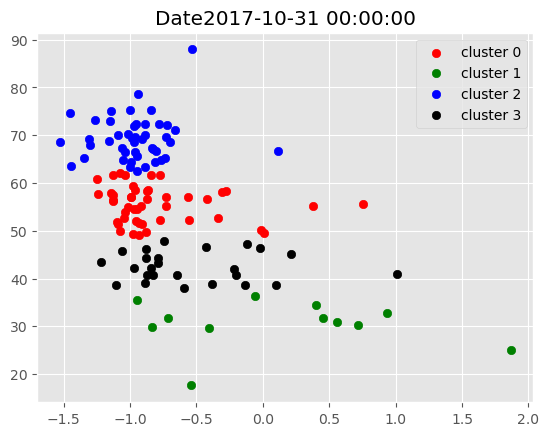

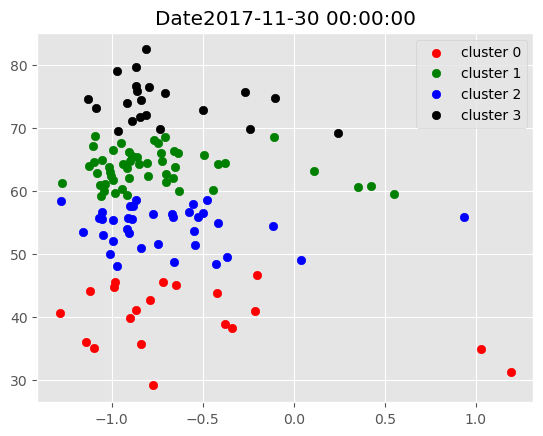

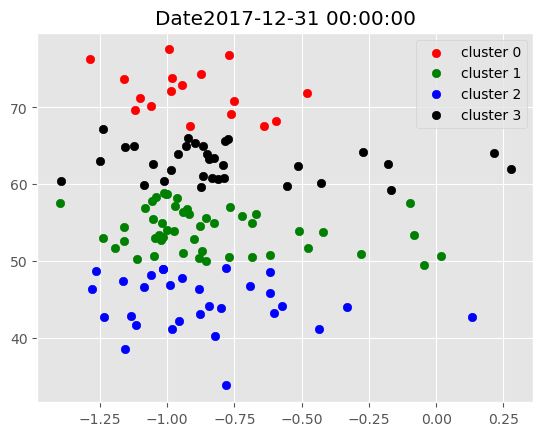

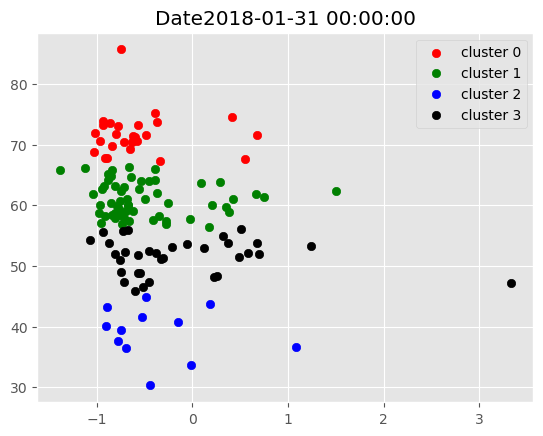

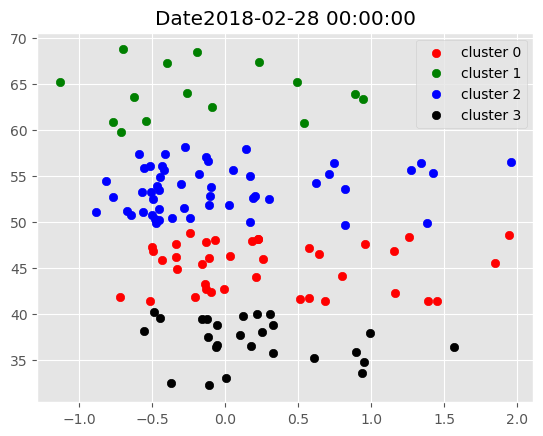

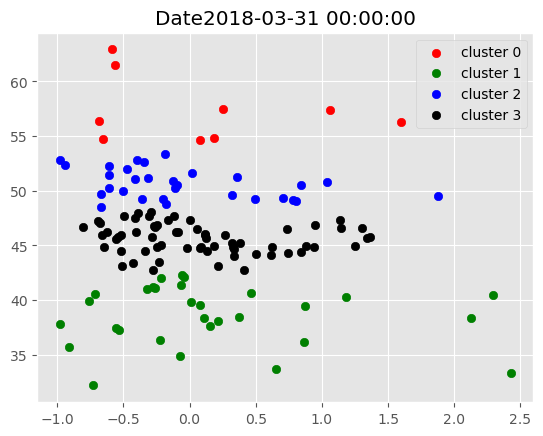

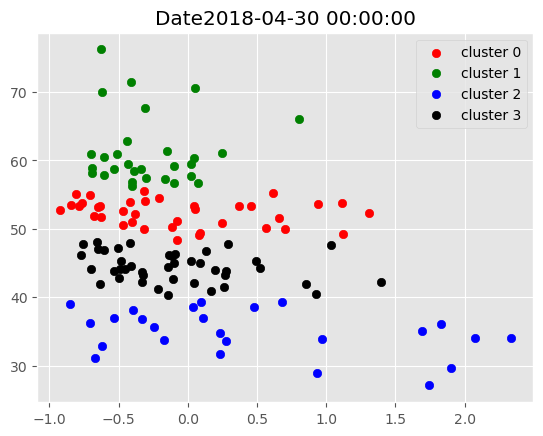

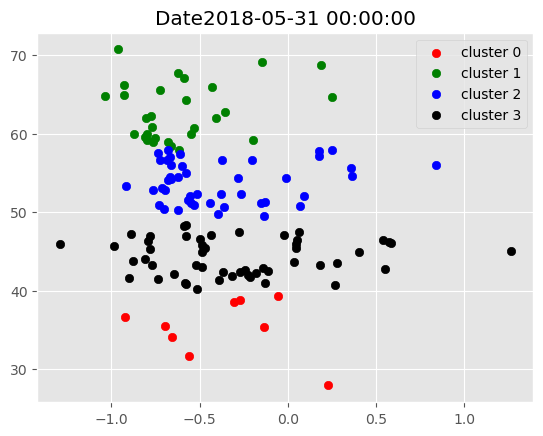

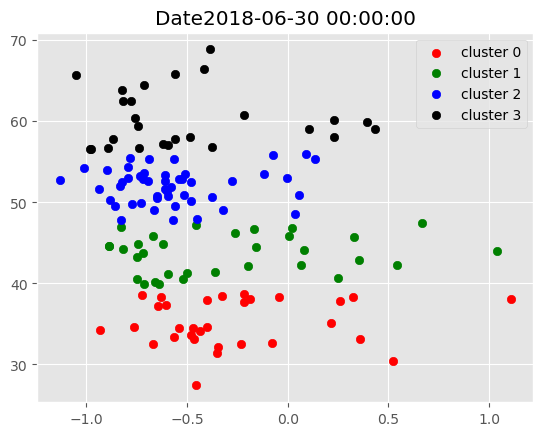

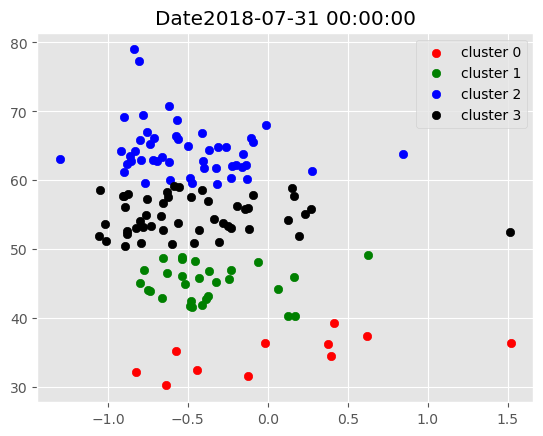

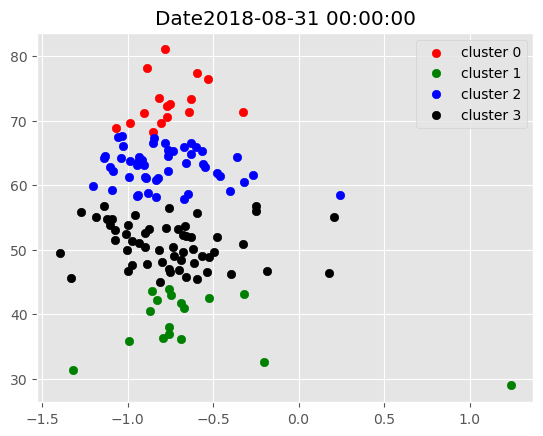

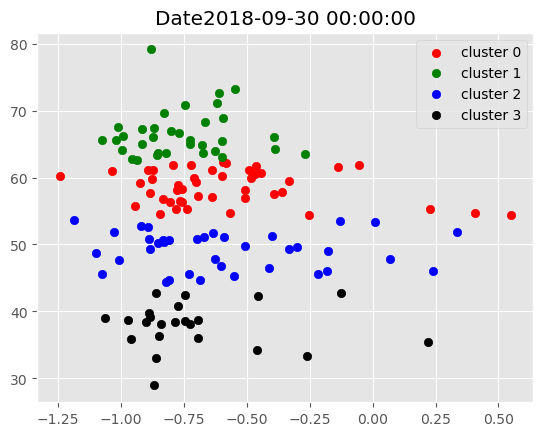

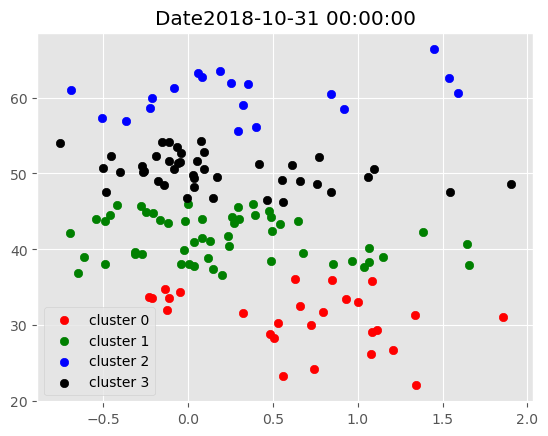

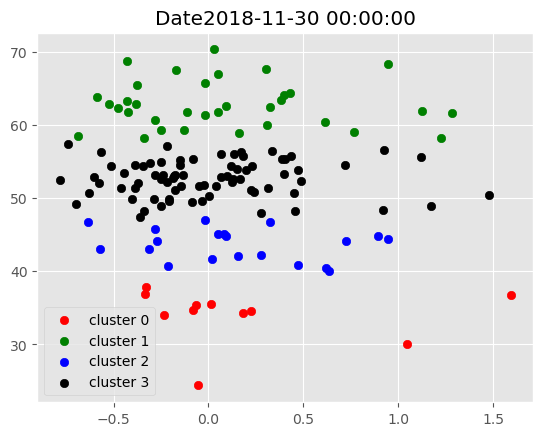

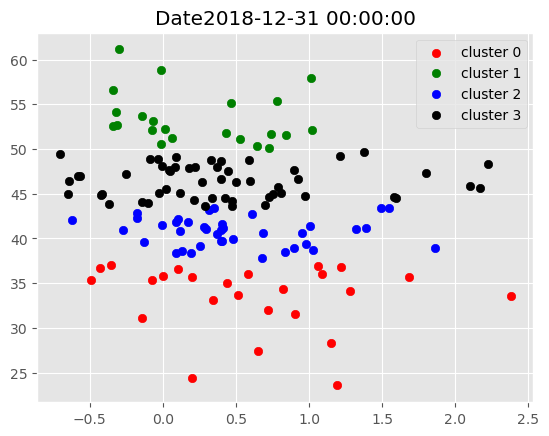

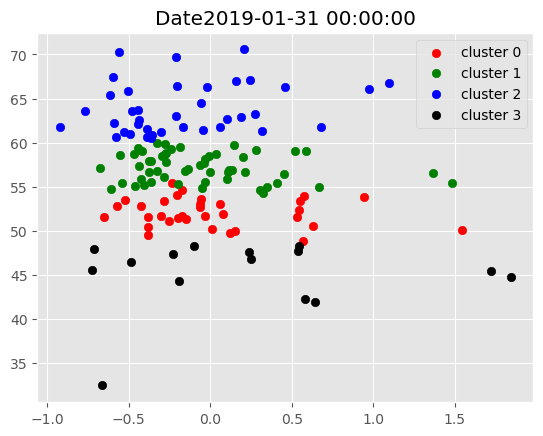

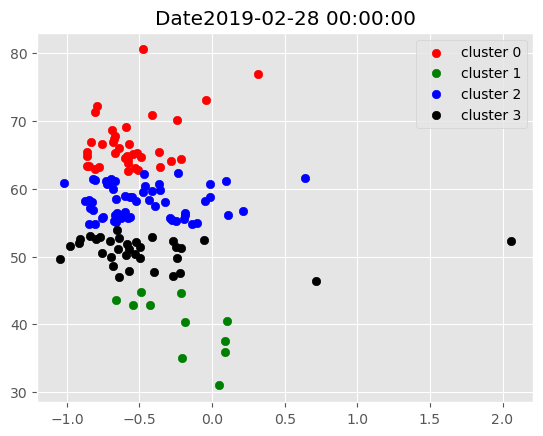

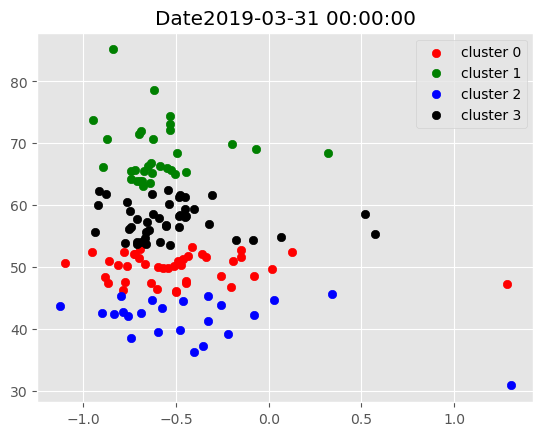

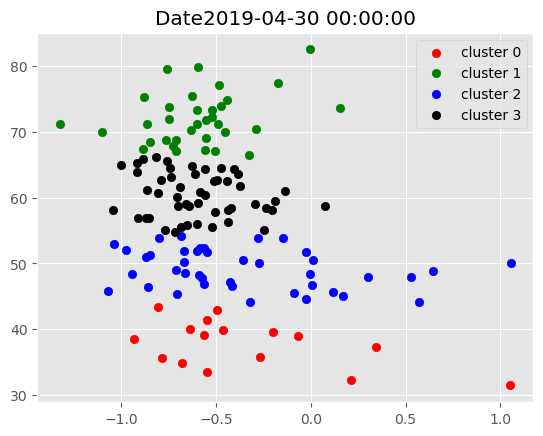

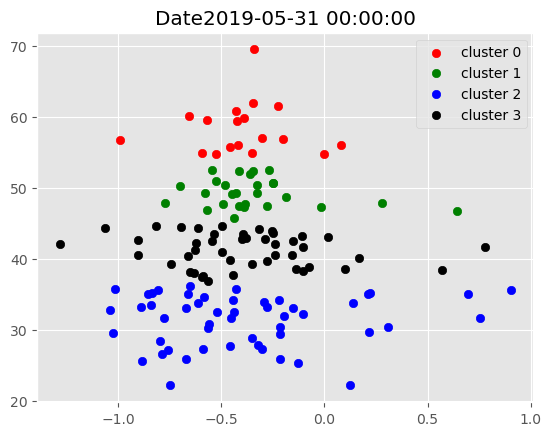

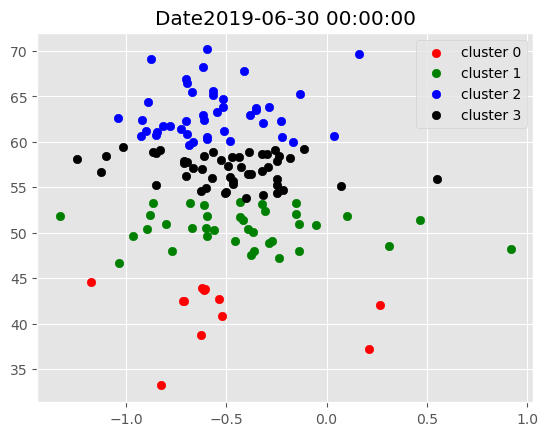

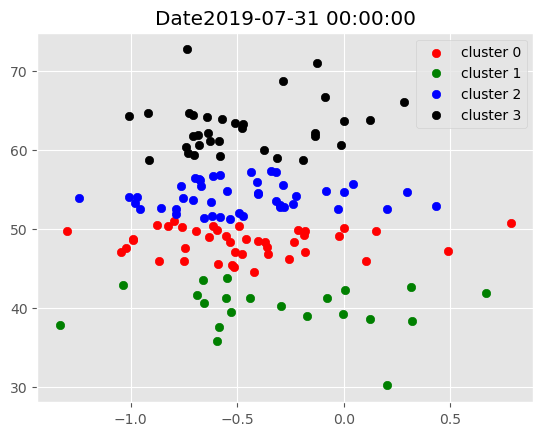

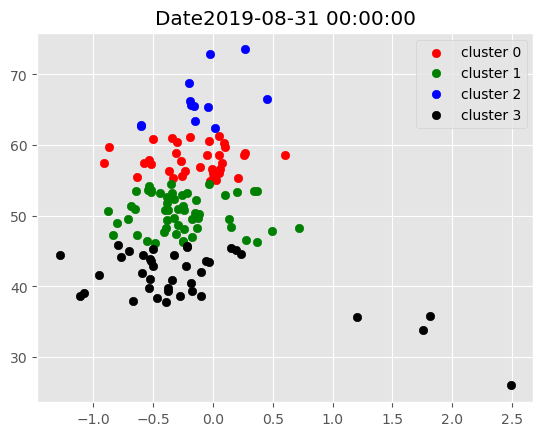

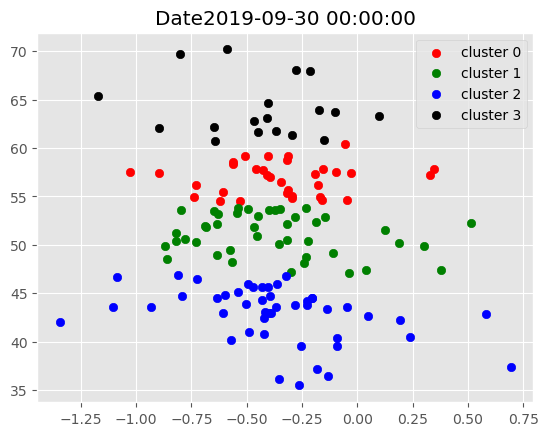

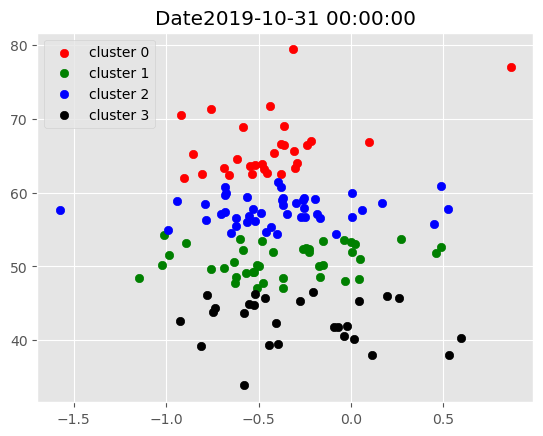

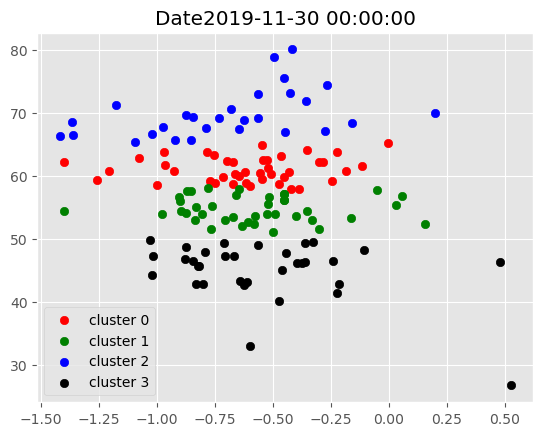

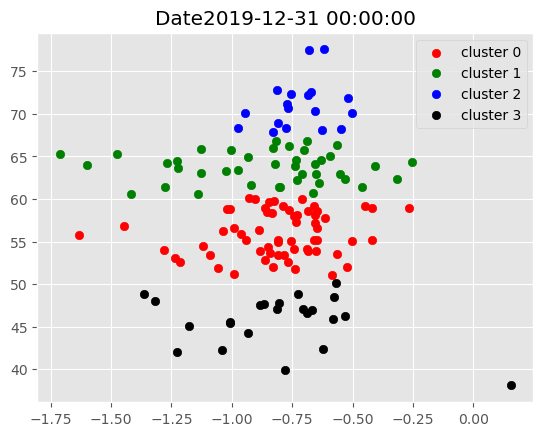

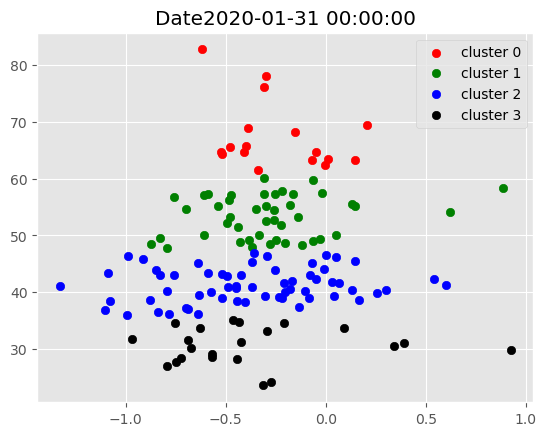

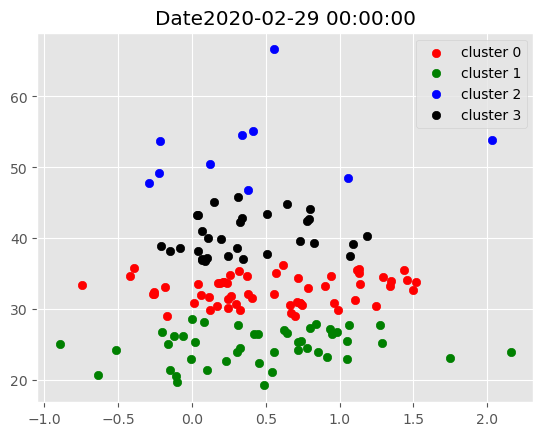

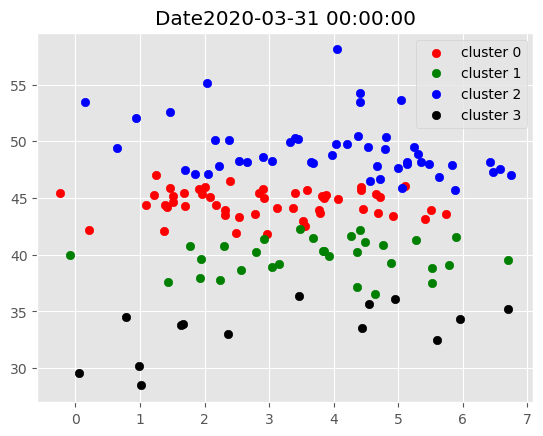

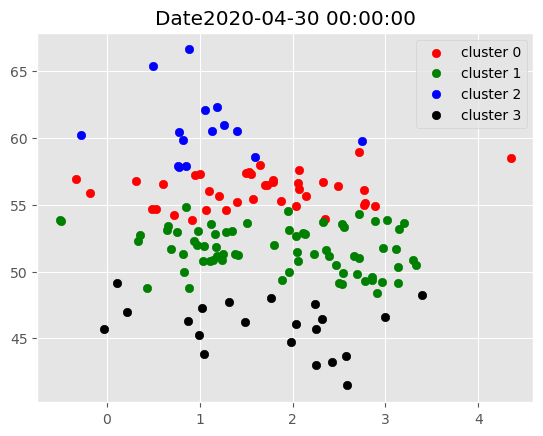

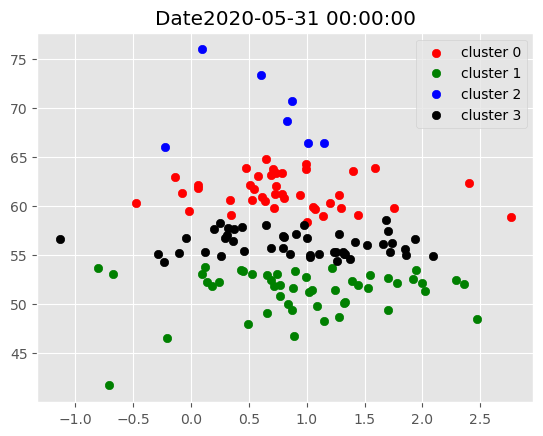

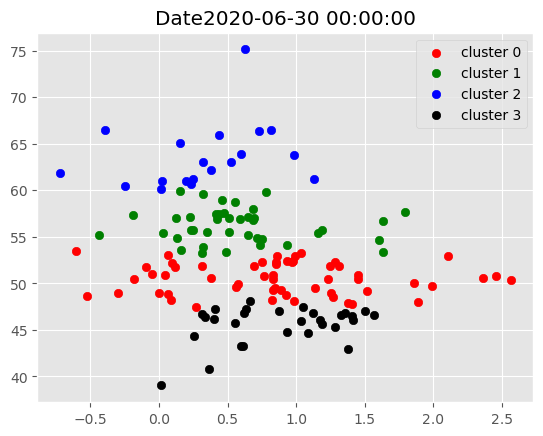

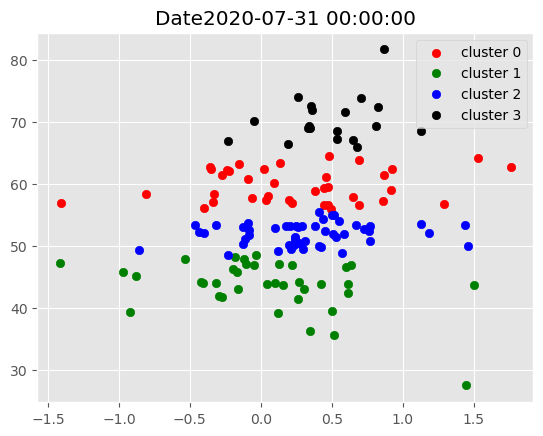

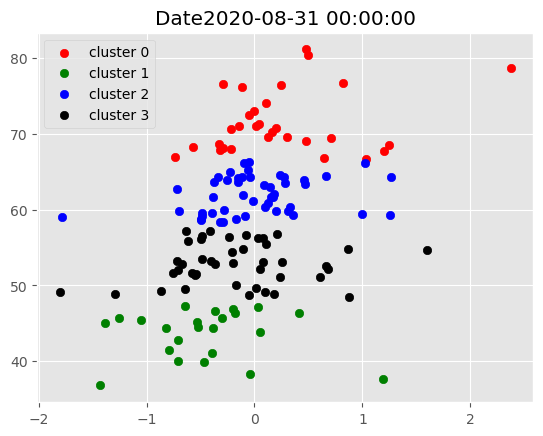

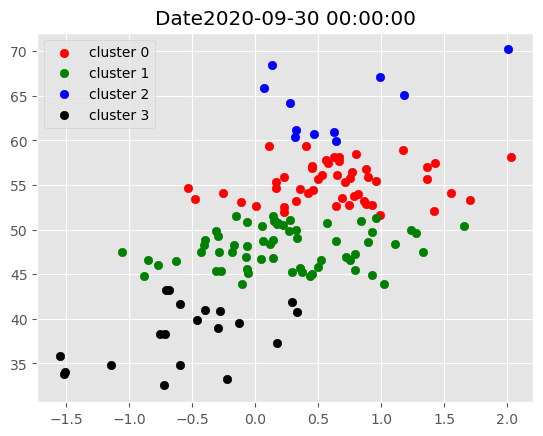

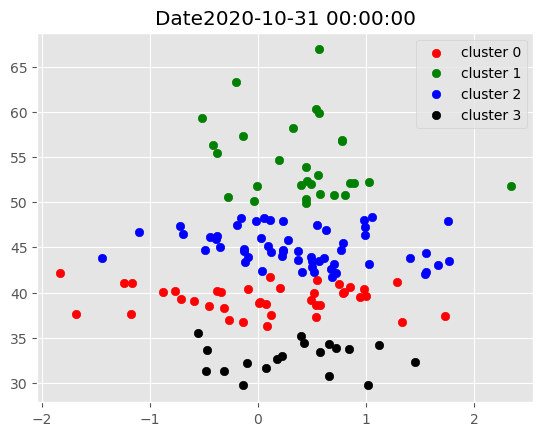

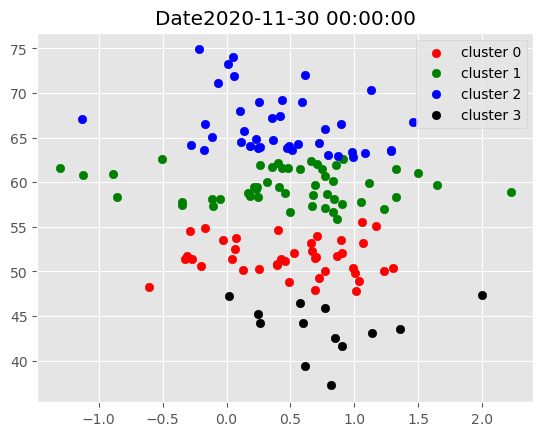

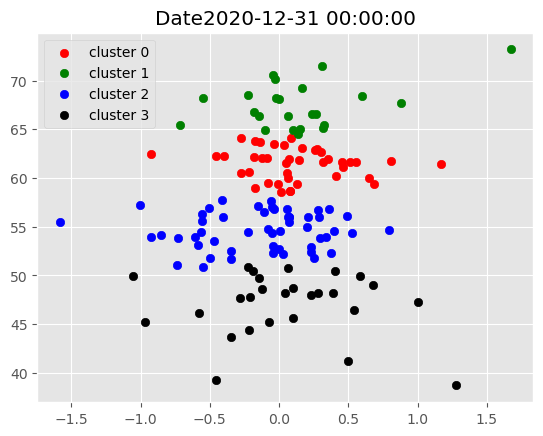

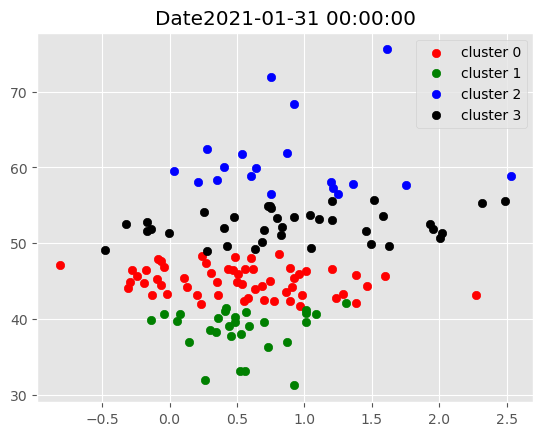

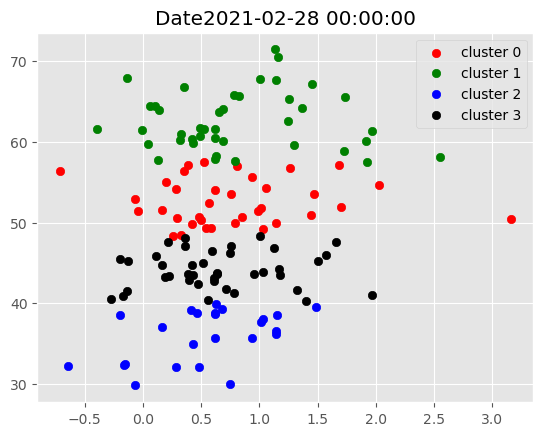

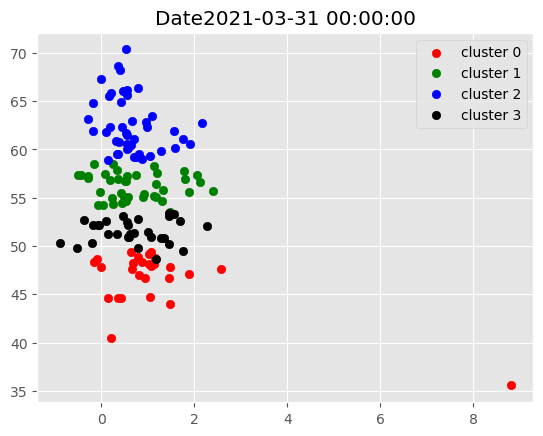

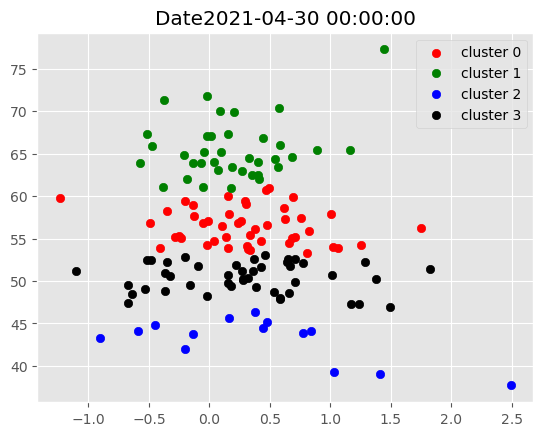

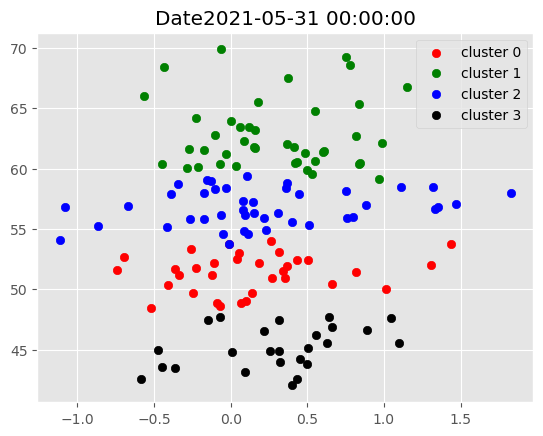

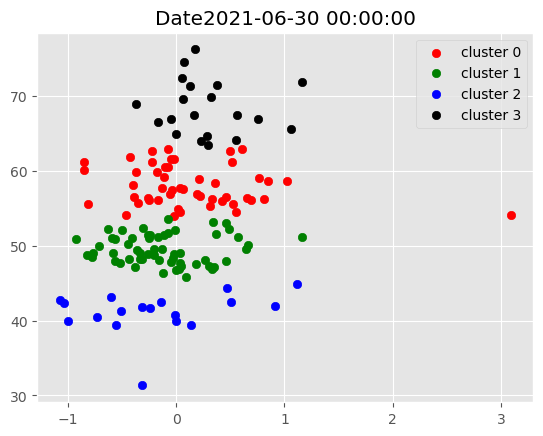

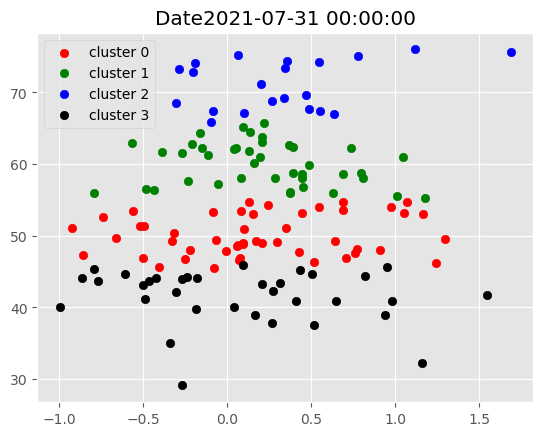

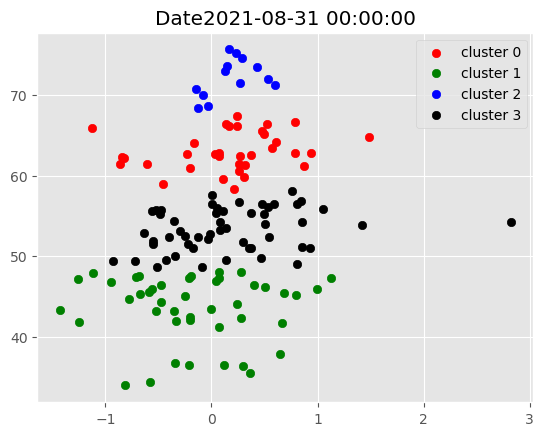

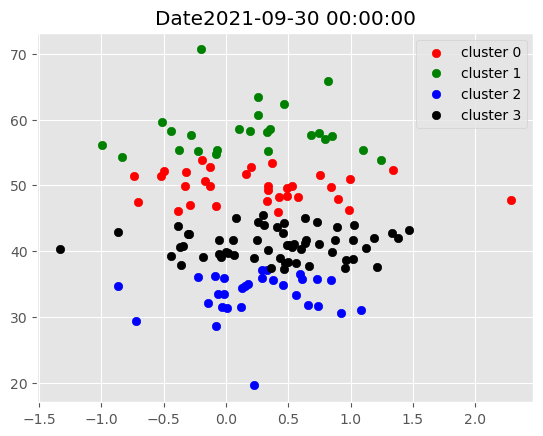

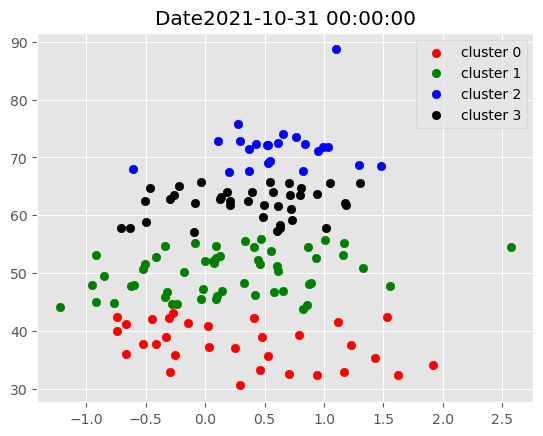

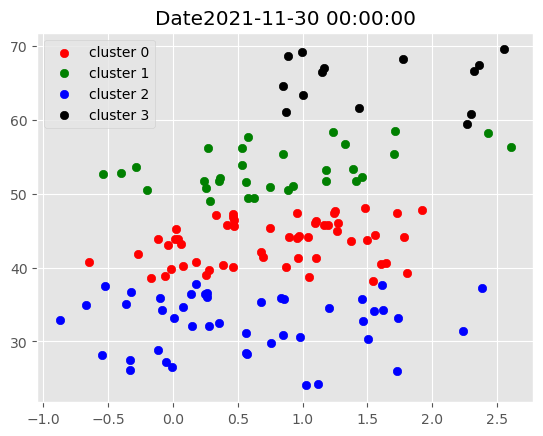

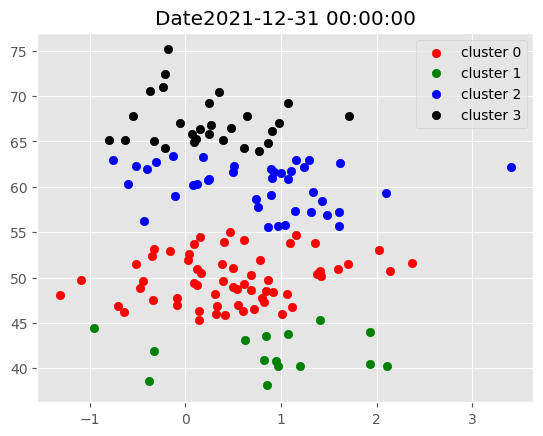

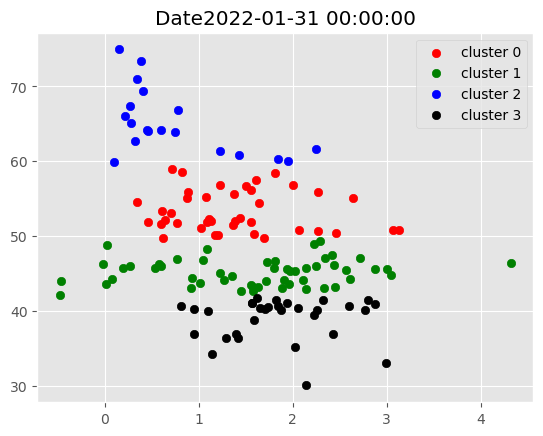

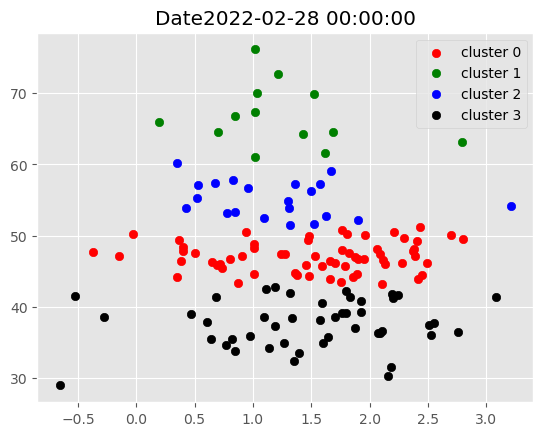

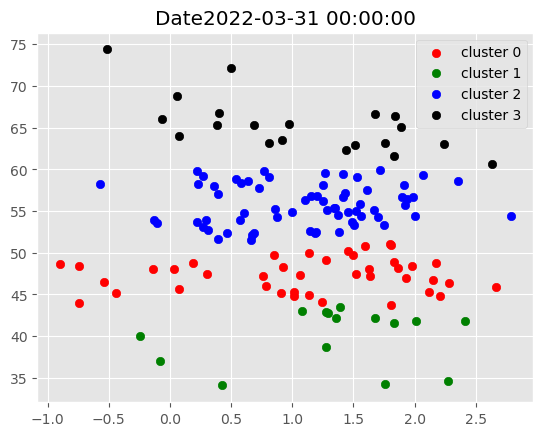

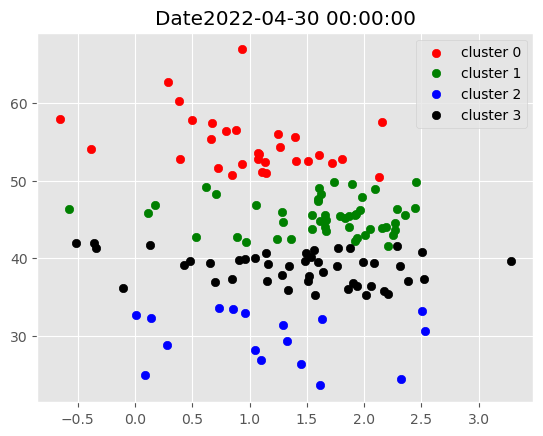

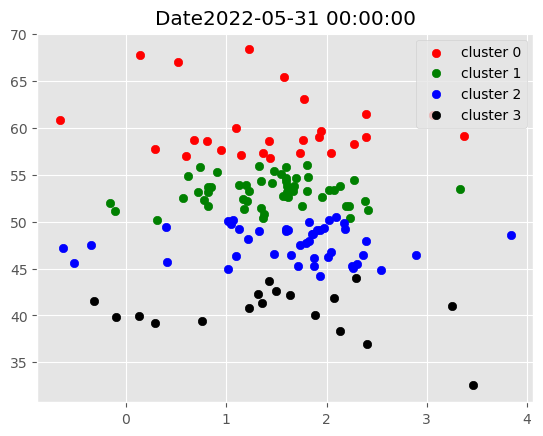

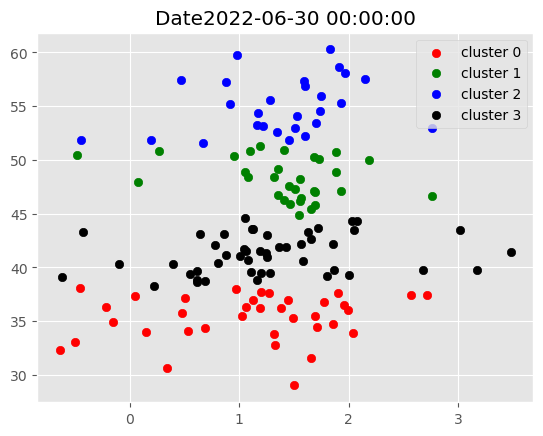

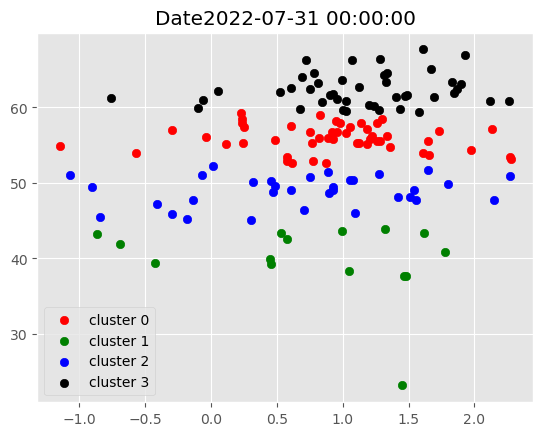

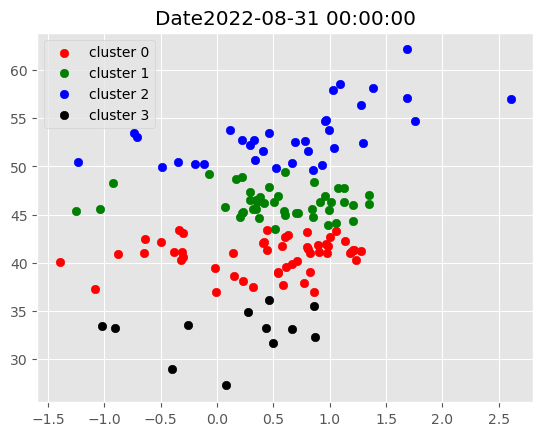

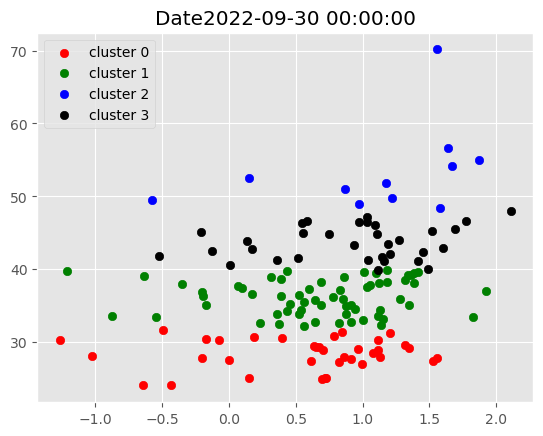

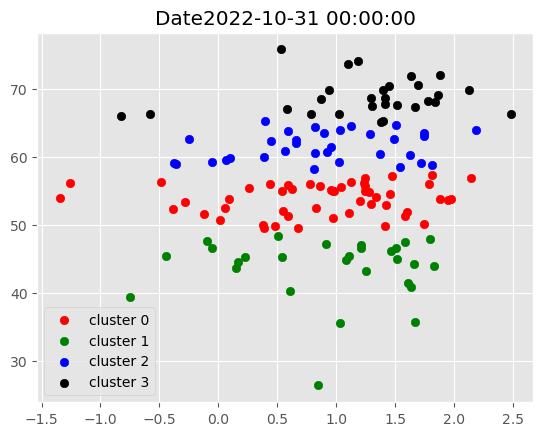

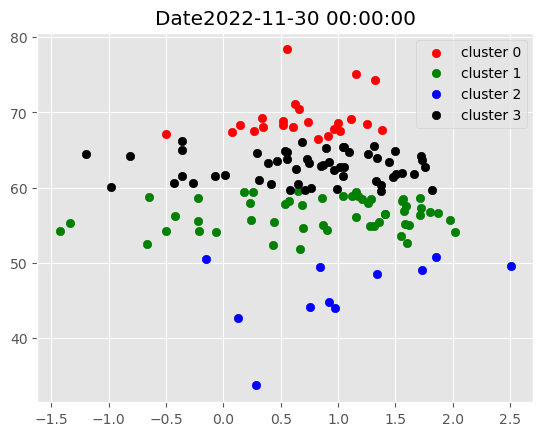

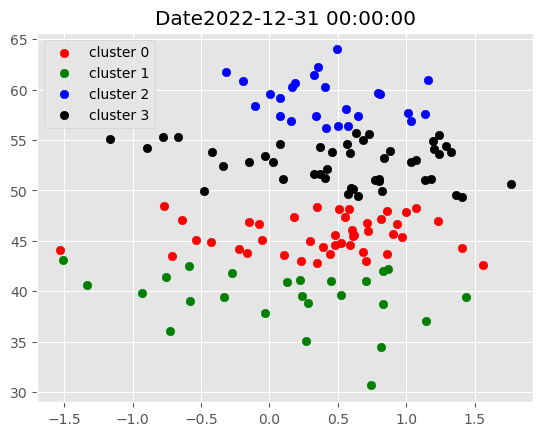

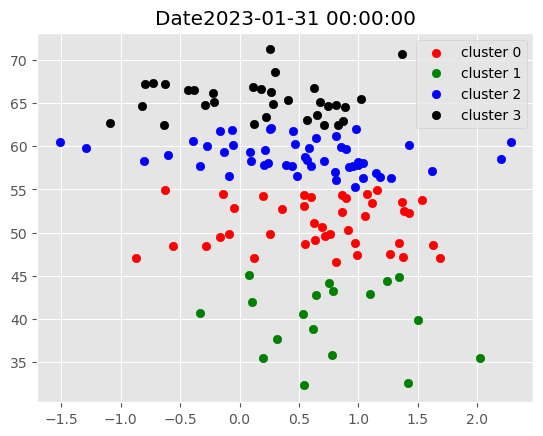

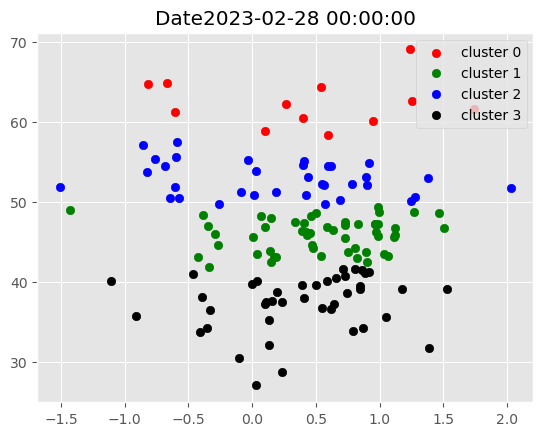

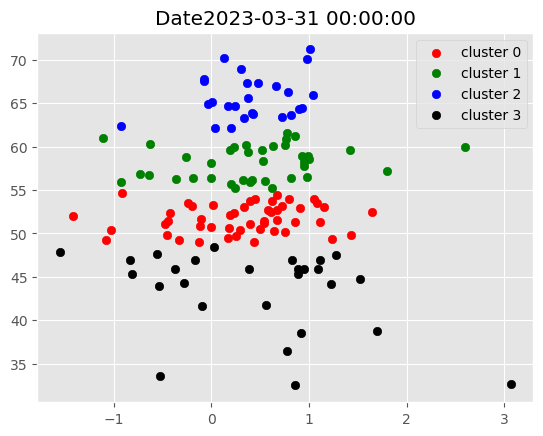

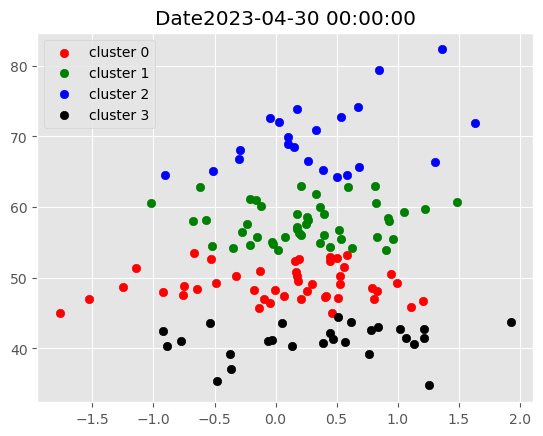

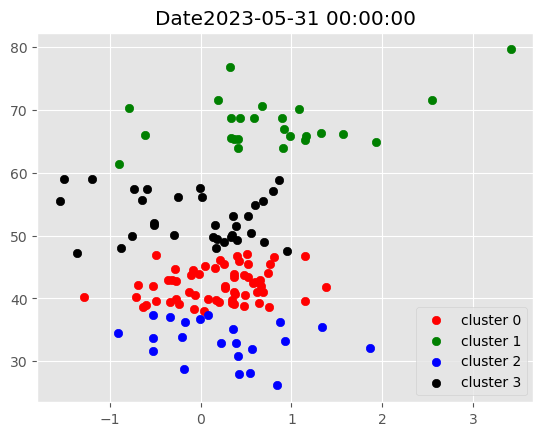

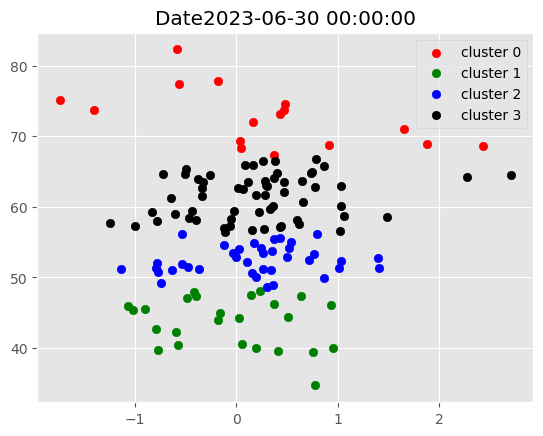

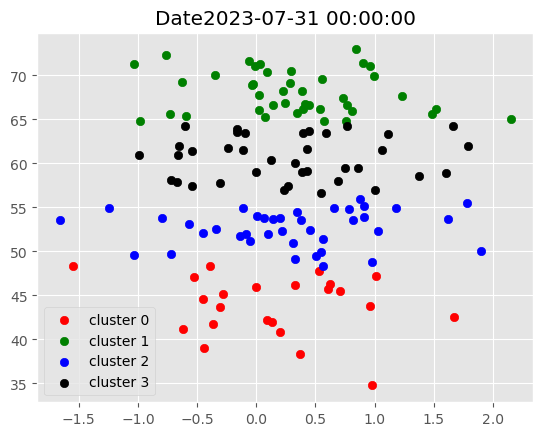

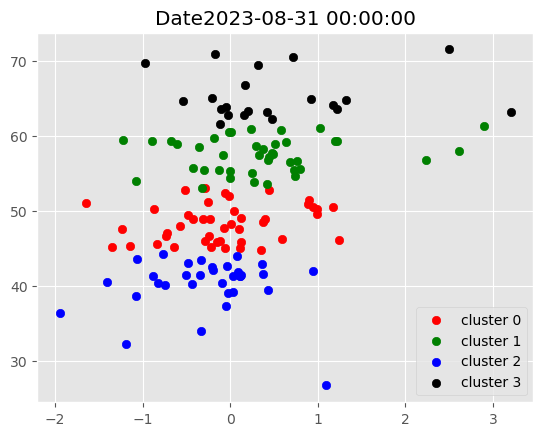

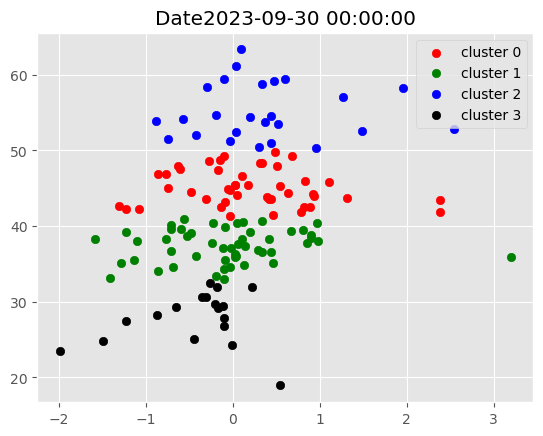

In [547]:
plt.style.use('ggplot')
for i in data.index.get_level_values('date').unique().tolist():
    g = data.xs(i, level=0)
    plt.title(f"Date{i}")
    plot_clusters(g)



In [750]:
target_rsi_values = [30, 45, 55, 70]

initial_centroids = np.zeros((len(target_rsi_values), 18))

initial_centroids[:, 1] = target_rsi_values

initial_centroids

array([[ 0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [752]:
from sklearn.cluster import KMeans

data = data.drop('cluster', axis=1)
def get_clusters(df):
    df['cluster'] = KMeans(n_clusters=4,
                          random_state=0,
                          init='random').fit(df).labels_
    return df

data = data.dropna().groupby('date', group_keys=False).apply(get_clusters)
data

garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                              
2017-10-31 AAL            -0.000363  41.051777  3.849110  3.921750  3.994389   
           AAPL           -0.001055  69.196731  3.594730  3.641603  3.688475   
           ABBV           -0.036142  55.247908  4.187696  4.234051  4.280405   
           ABT            -0.005677  53.844905  3.887385  3.910952  3.934519   
           ACN            -0.004274  69.365049  4.798335  4.838013  4.877691   
...                             ...        ...       ...       ...       ...   
2023-09-30 WMT            -0.000041  54.722528  3.984976  4.002446  4.019915   
           XOM            -0.000065  59.440178  4.687091  4.727187  4.767283   
           MRNA            0.000146  38.747314  4.582514  4.685332  4.788149   
           UBER            0.000441  45.005268  3.806654  3.862227  3.917801   
           CRWD            0.000144  51.534803  5.026187  5.103696  5.181204   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2017-10-31 AAL     1.011062 -0.018698  -0.014108   0.022981  -0.023860   
           AAPL   -0.906642 -0.039275   0.096808   0.015250   0.044955   
           ABBV    0.375557  0.473815   0.022728   0.098590   0.091379   
           ABT    -1.040044  0.276133   0.021276   0.034308   0.034801   
           ACN    -0.986514  0.352342   0.064180   0.048455   0.037203   
...                     ...       ...        ...        ...        ...   
2023-09-30 WMT    -0.196381  0.399458  -0.000676   0.010014   0.012354   
           XOM     0.601335  1.400623   0.046947   0.046139   0.030496   
           MRNA   -0.529511 -0.376899  -0.132219  -0.086803  -0.068763   
           UBER   -0.746098 -0.133973  -0.062672  -0.053920   0.008422   
           CRWD   -0.744862  0.245950  -0.015641  -0.003656   0.029981   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2017-10-31 AAL      0.016495   0.007008    0.012702  1.263867  1.322360   
           AAPL     0.028875   0.038941    0.035228  1.273284 -0.270024   
           ABBV     0.056495   0.047273    0.044026  0.494007  0.372029   
           ABT      0.038672   0.031320    0.029294  0.829747 -0.202850   
           ACN      0.028692   0.027398    0.018728  1.199274 -0.166729   
...                      ...        ...         ...       ...       ...   
2023-09-30 WMT      0.017574   0.016553    0.020256  0.740334 -0.259860   
           XOM      0.012838   0.008747    0.027037  1.001239 -1.055135   
           MRNA    -0.071952  -0.064976   -0.015431  1.155517  0.767772   
           UBER     0.057244   0.066838    0.043691  1.080479  1.180797   
           CRWD     0.026391   0.047942   -0.002216  0.595945 -0.916784   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2017-10-31 AAL     0.589851  0.475525  0.574169        0  
           AAPL   -0.592822  0.656516  0.458466        3  
           ABBV   -0.045655  0.257913  0.183429        2  
           ABT    -0.528481  0.244475  0.972082        2  
           ACN    -0.329662  0.266733  0.173061        3  
...                     ...       ...       ...      ...  
2023-09-30 WMT    -0.524398 -0.124577  0.651560        1  
           XOM     1.725821 -0.658414 -0.329149        1  
           MRNA   -1.156852  0.597846  0.995470        0  
           UBER   -0.303488 -1.488702 -0.381346        2  
           CRWD   -0.739516 -2.459211 -0.722896        1  

[10126 rows x 19 columns]

In [754]:
def plot_clusters(data):

    cluster_0 = data[data['cluster']==0]
    cluster_1 = data[data['cluster']==1]
    cluster_2 = data[data['cluster']==2]
    cluster_3 = data[data['cluster']==3]

    plt.scatter(cluster_0.iloc[:,5] , cluster_0.iloc[:,1] , color = 'red', label='cluster 0')
    plt.scatter(cluster_1.iloc[:,5] , cluster_1.iloc[:,1] , color = 'green', label='cluster 1')
    plt.scatter(cluster_2.iloc[:,5] , cluster_2.iloc[:,1] , color = 'blue', label='cluster 2')
    plt.scatter(cluster_3.iloc[:,5] , cluster_3.iloc[:,1] , color = 'black', label='cluster 3')
    
    plt.legend()
    plt.show()
    return

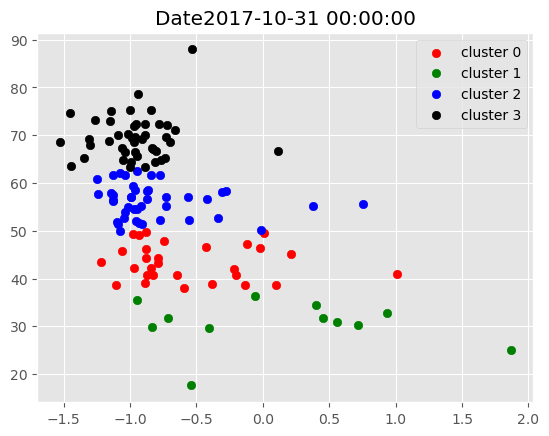

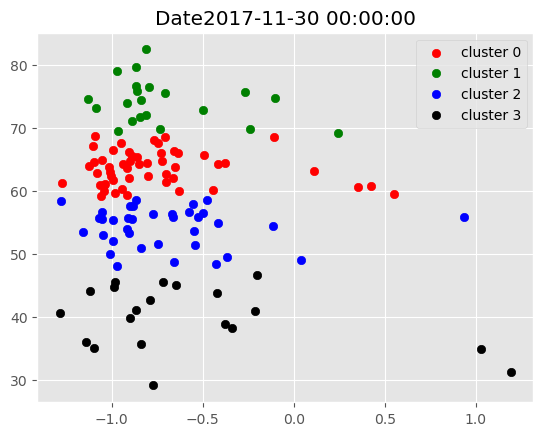

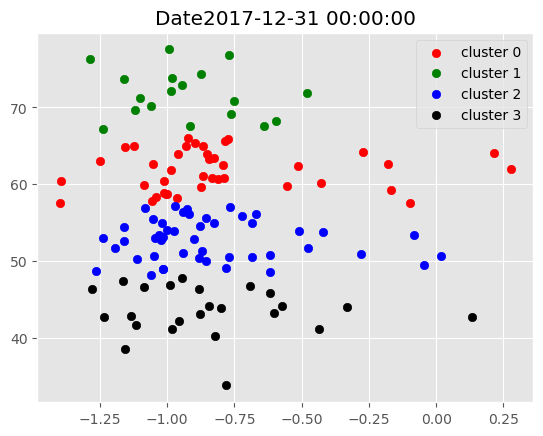

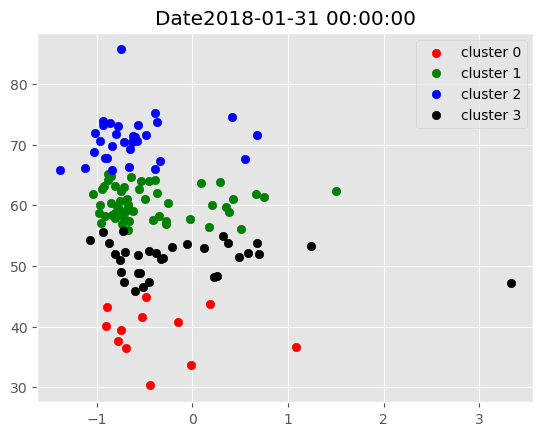

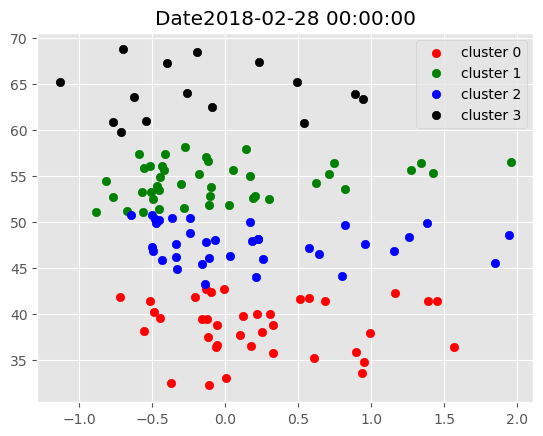

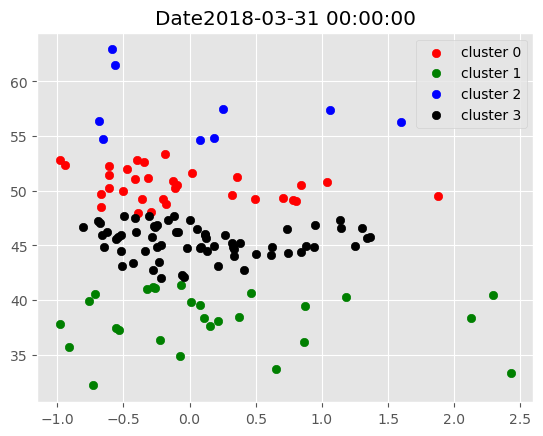

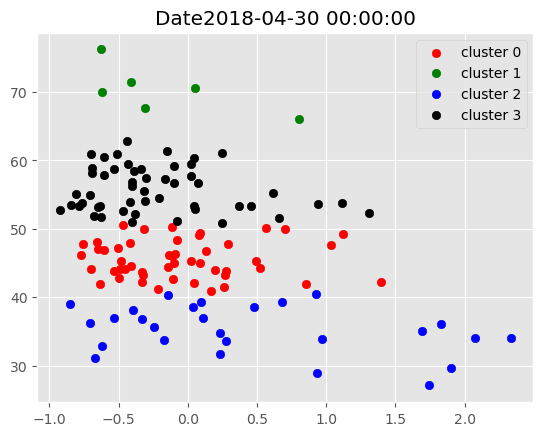

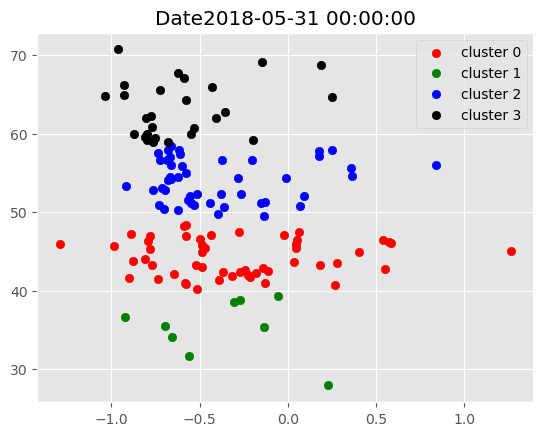

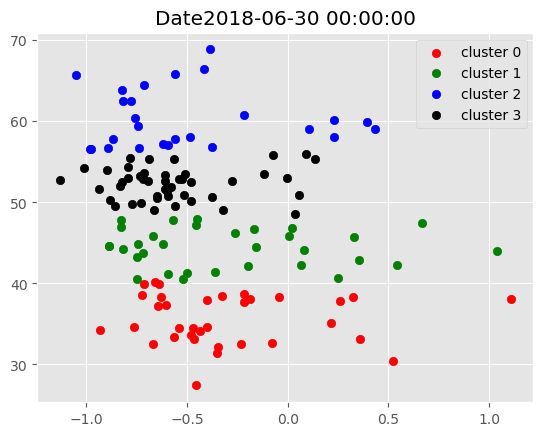

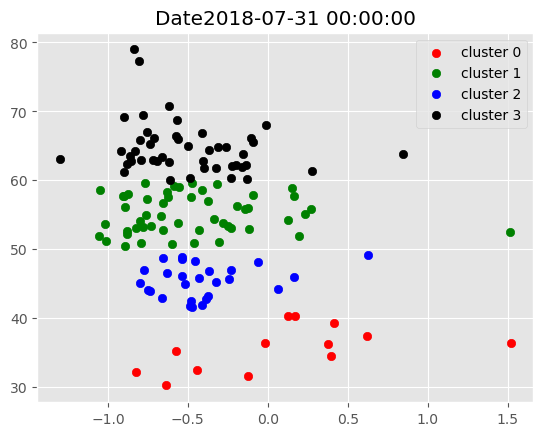

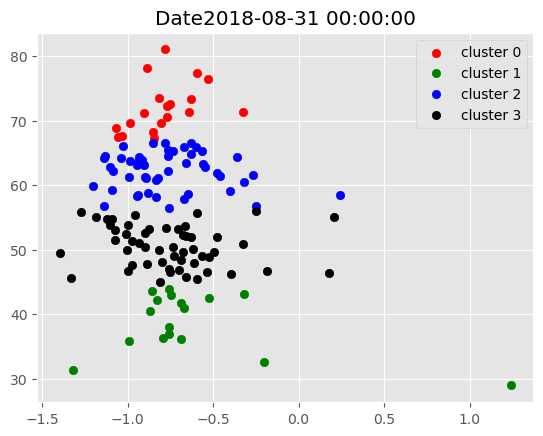

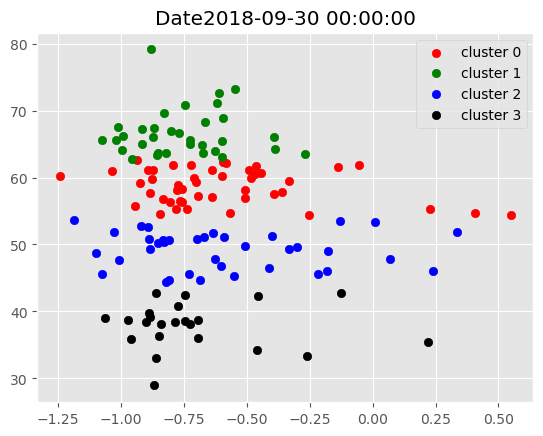

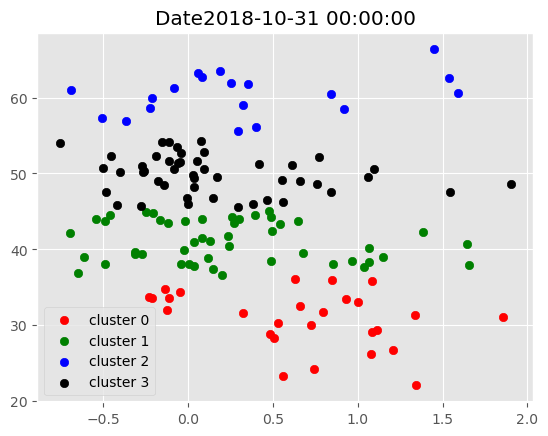

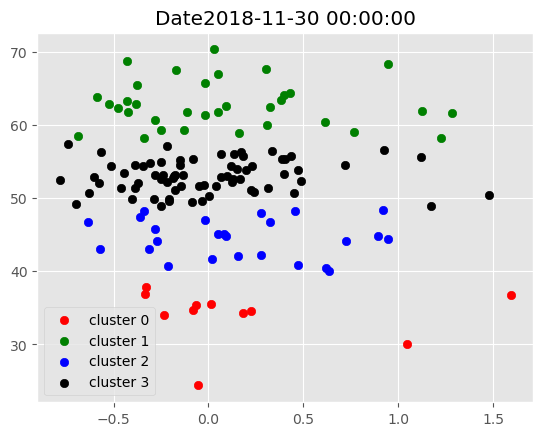

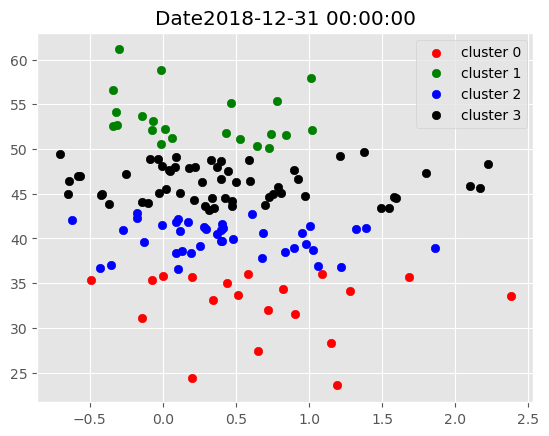

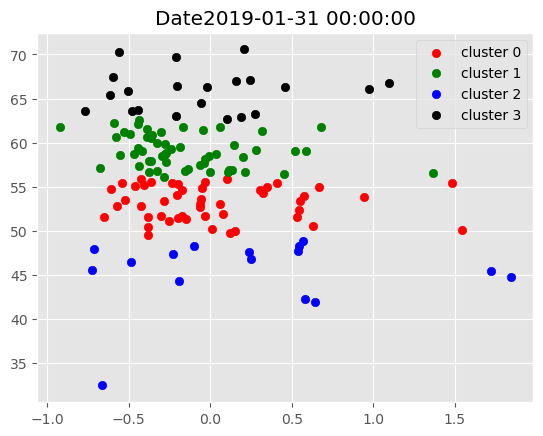

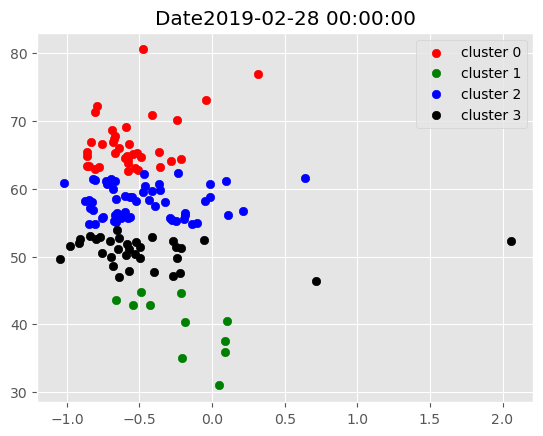

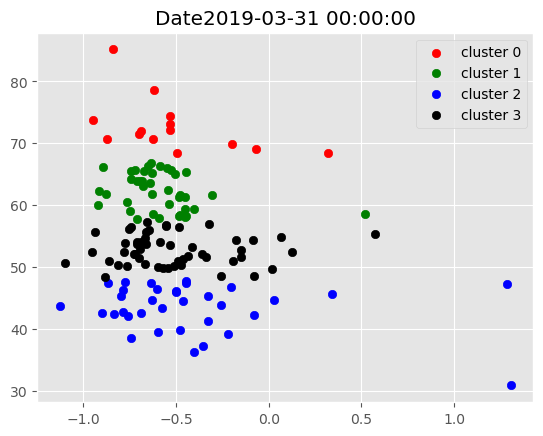

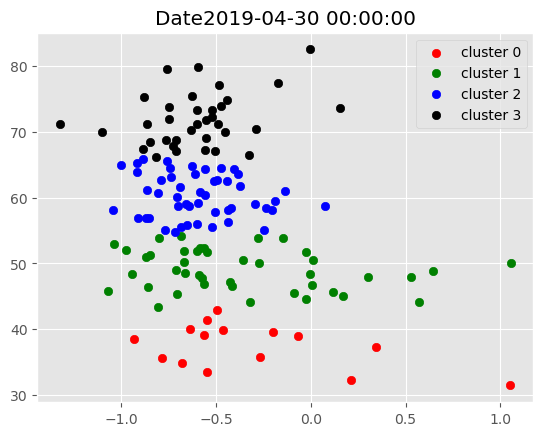

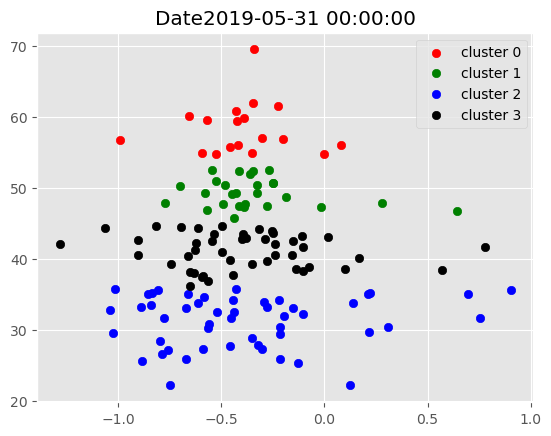

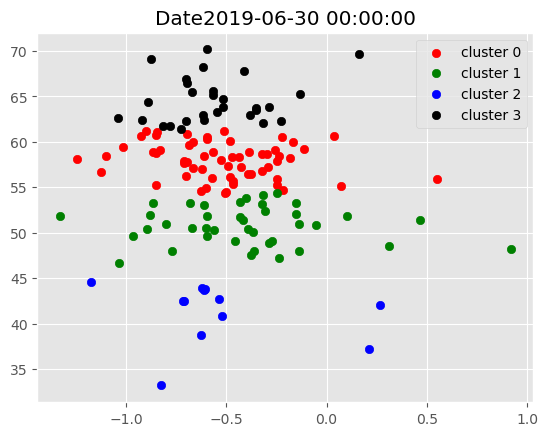

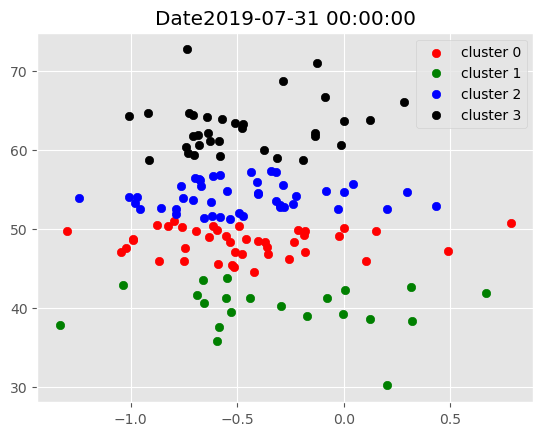

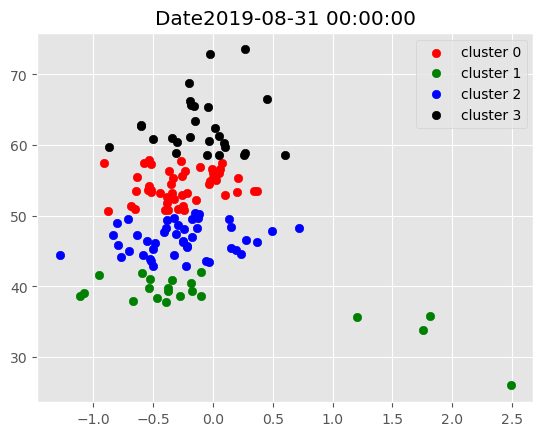

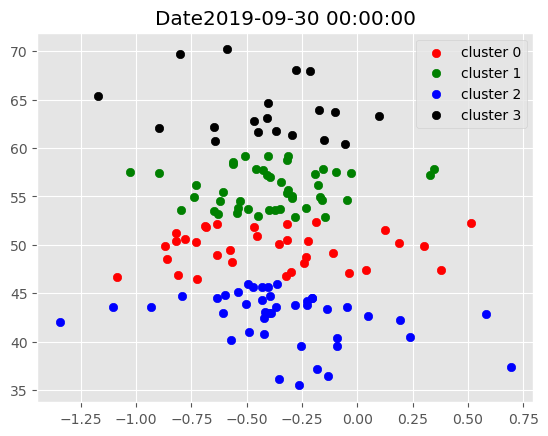

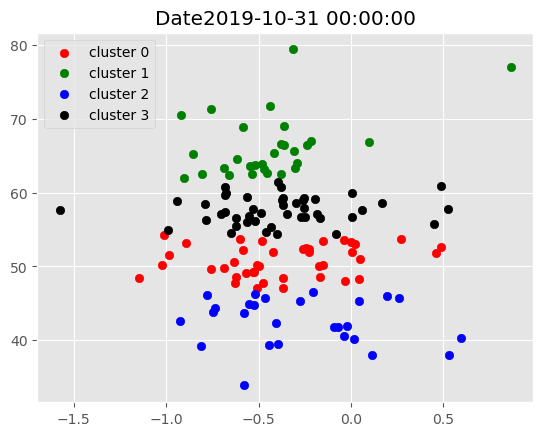

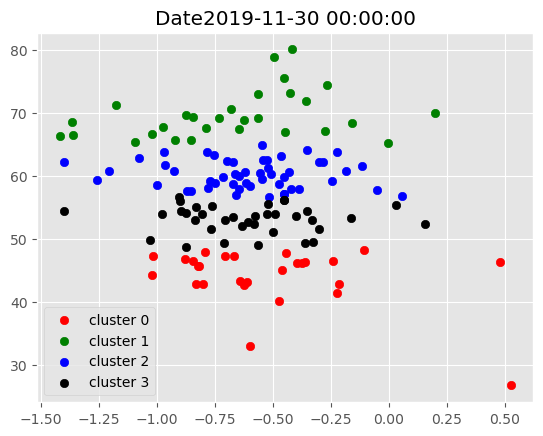

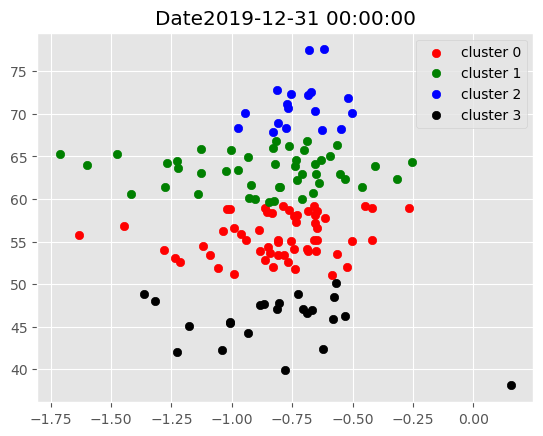

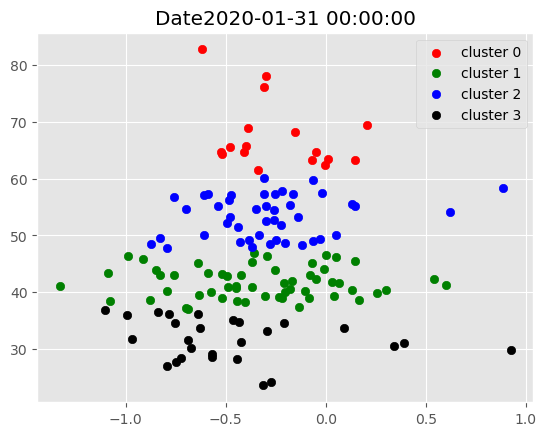

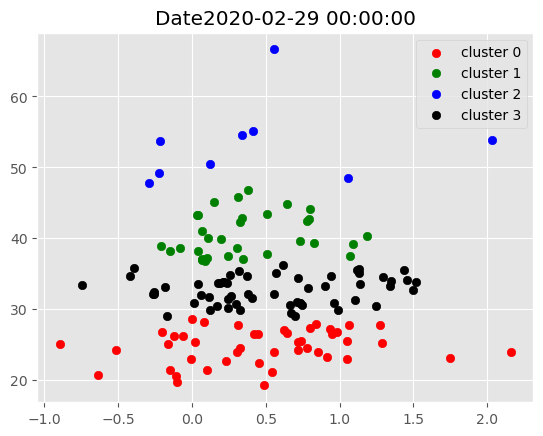

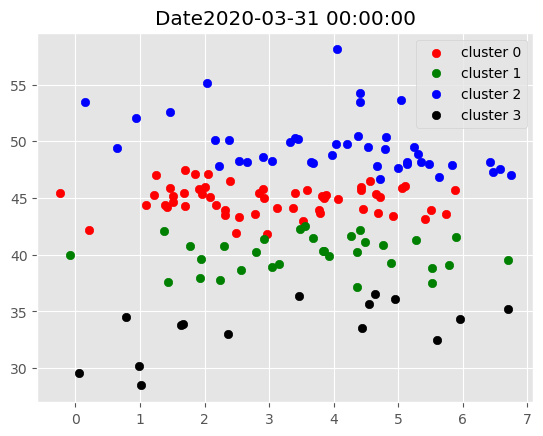

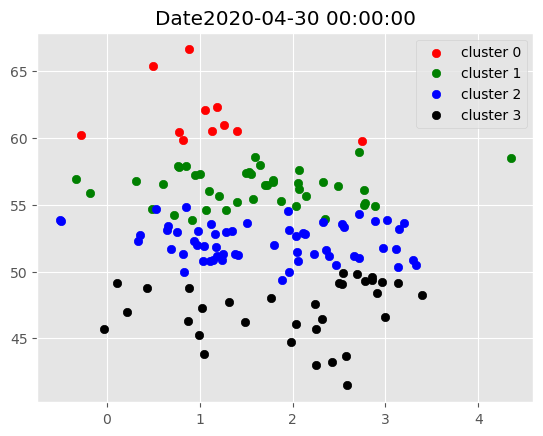

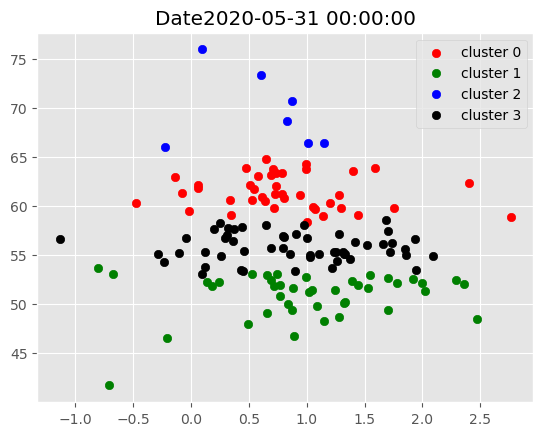

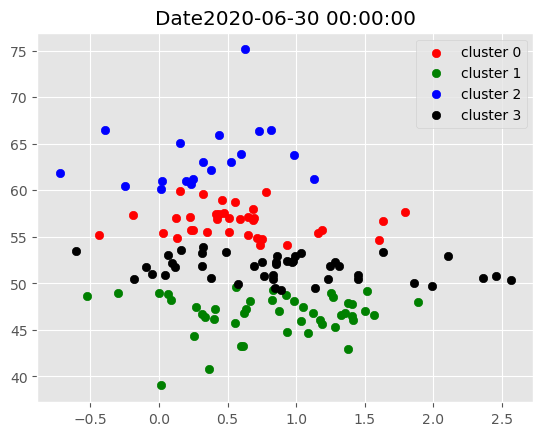

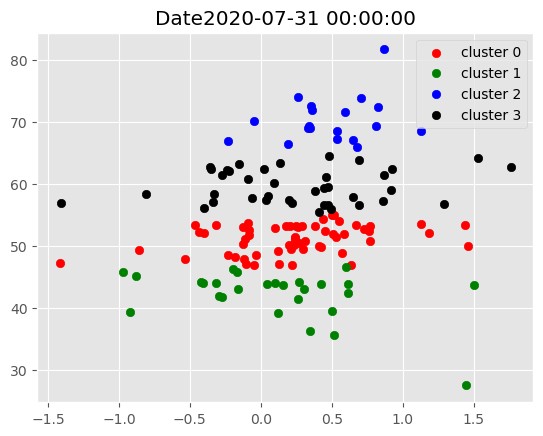

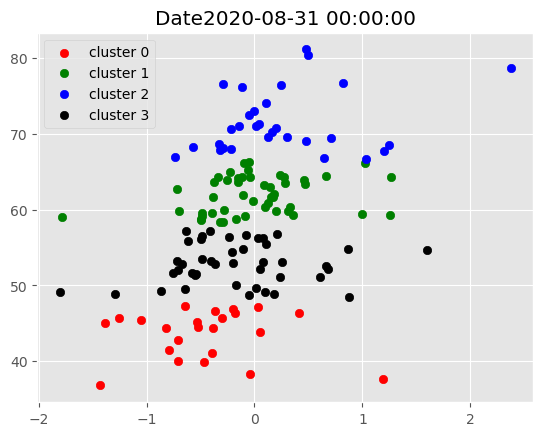

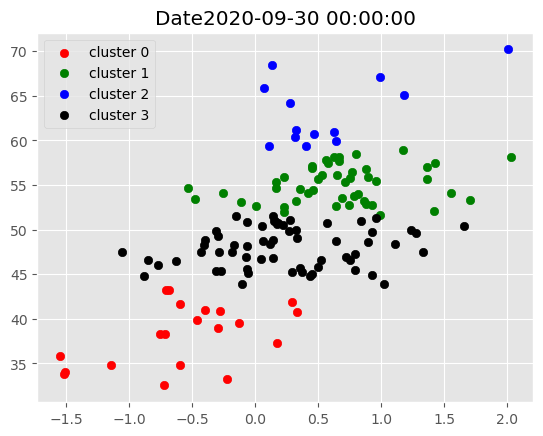

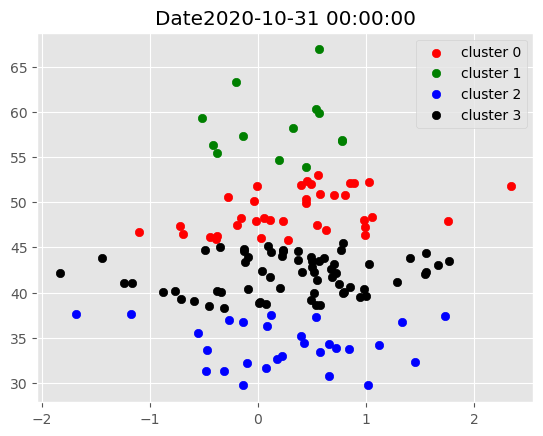

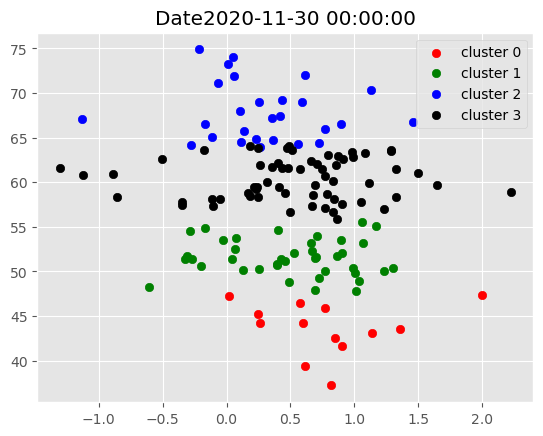

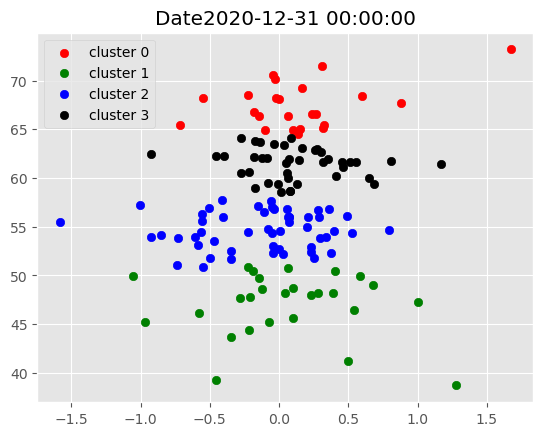

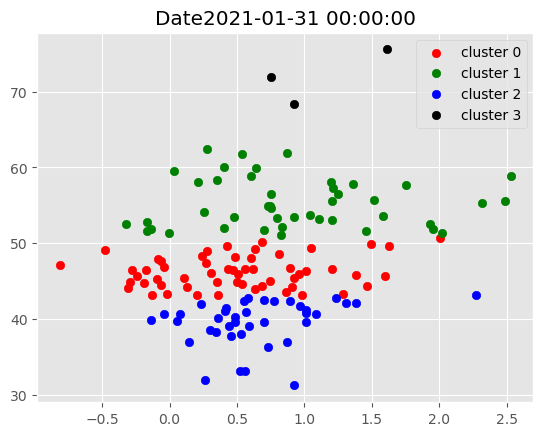

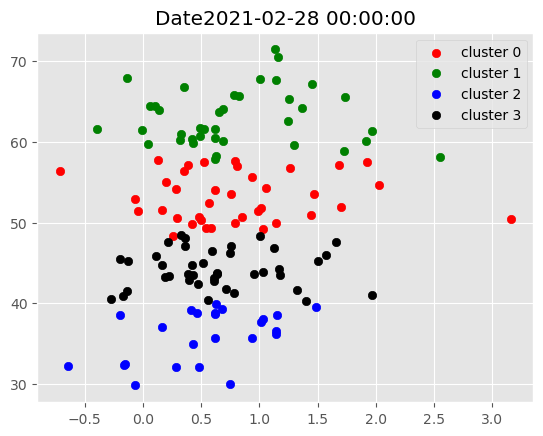

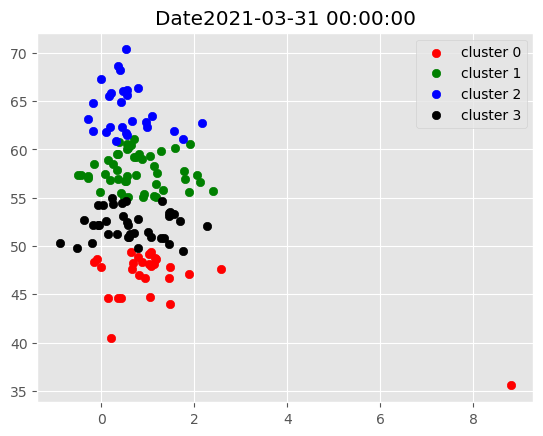

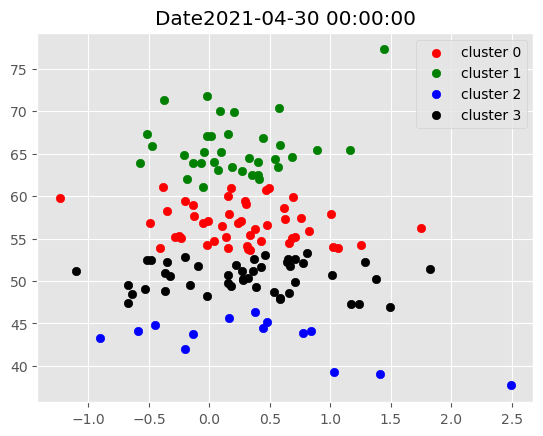

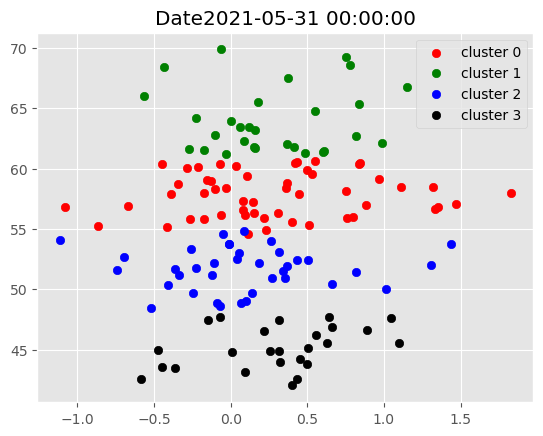

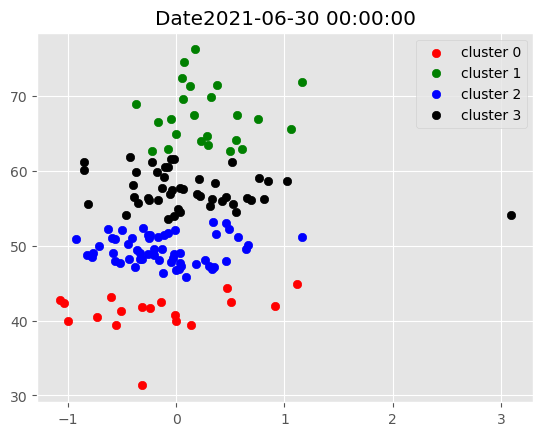

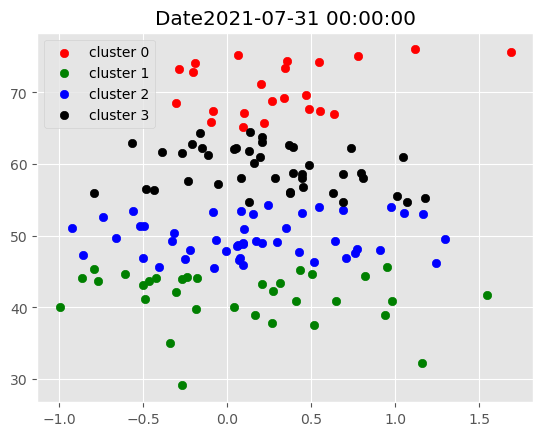

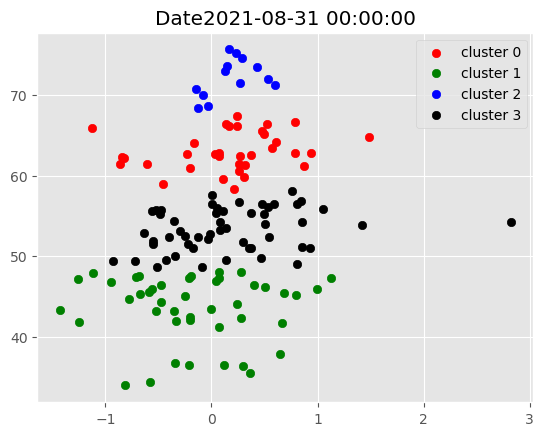

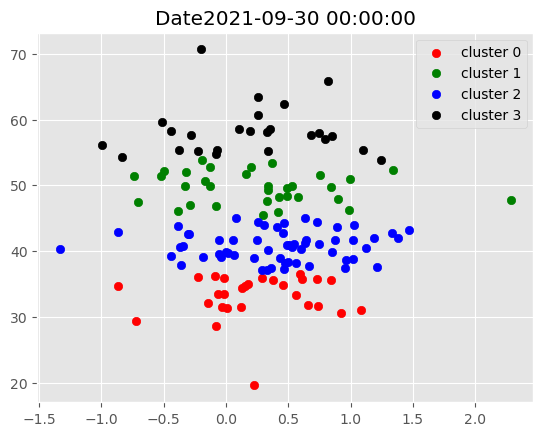

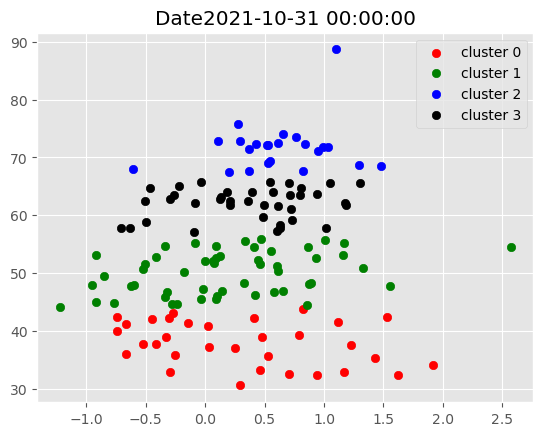

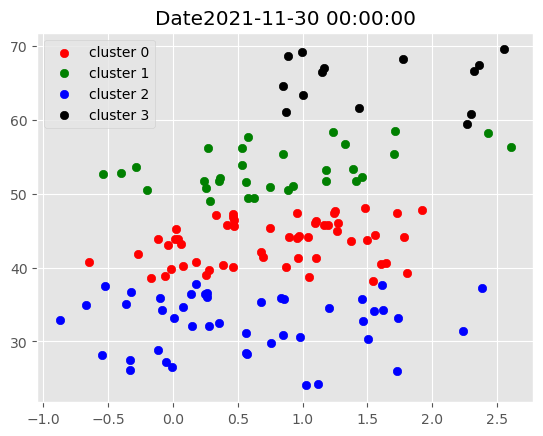

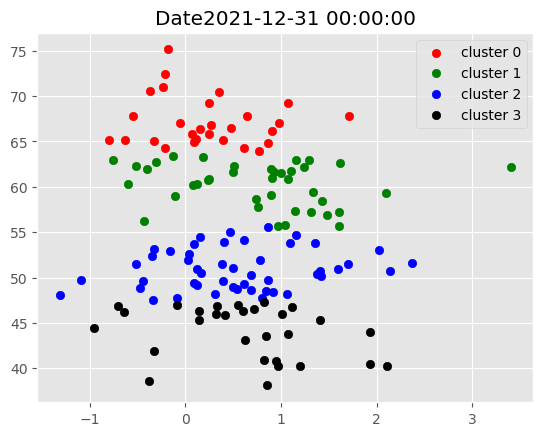

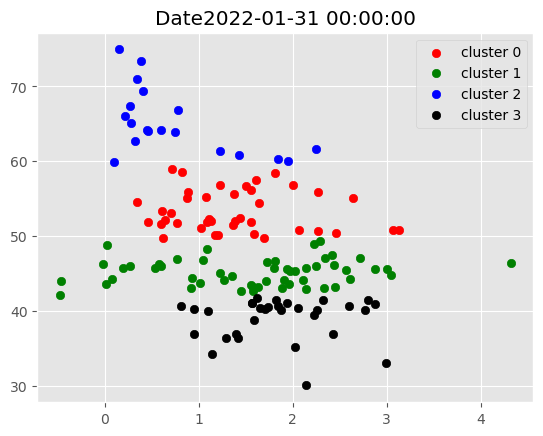

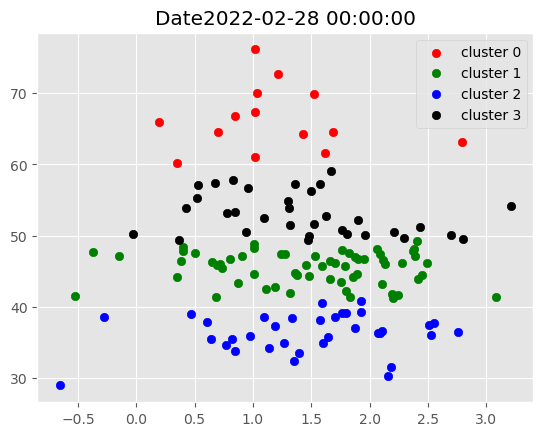

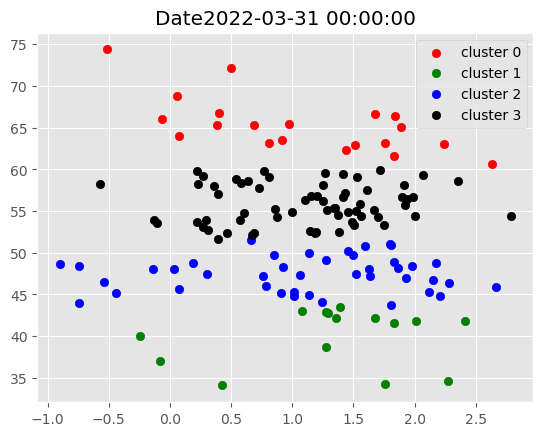

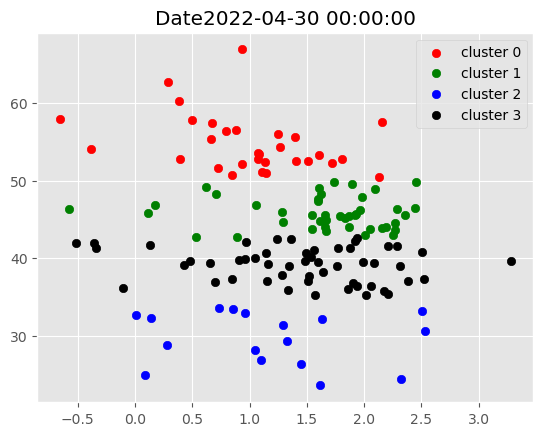

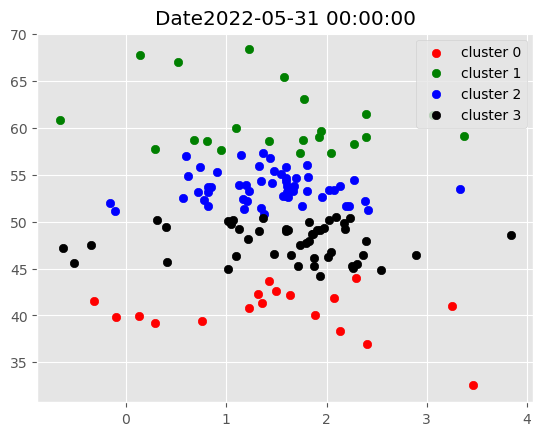

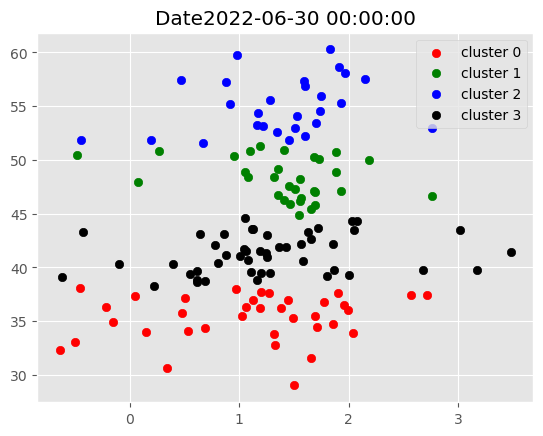

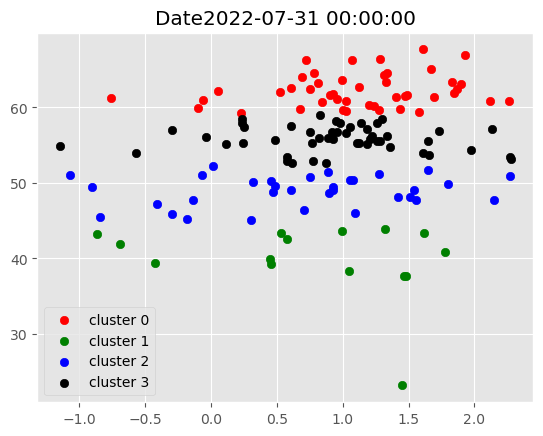

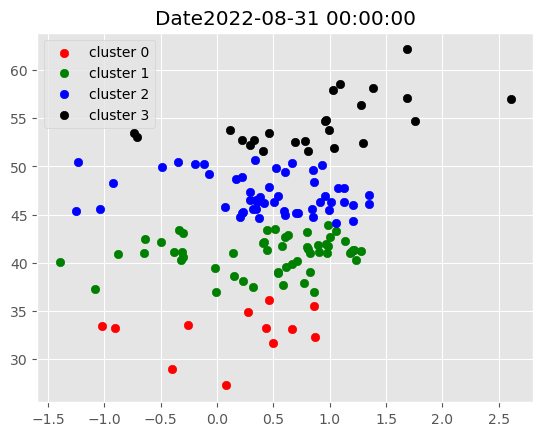

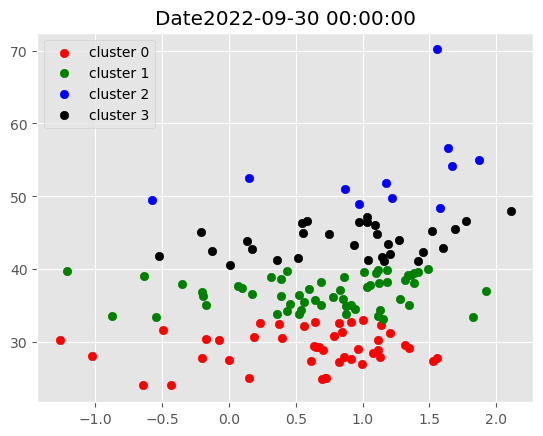

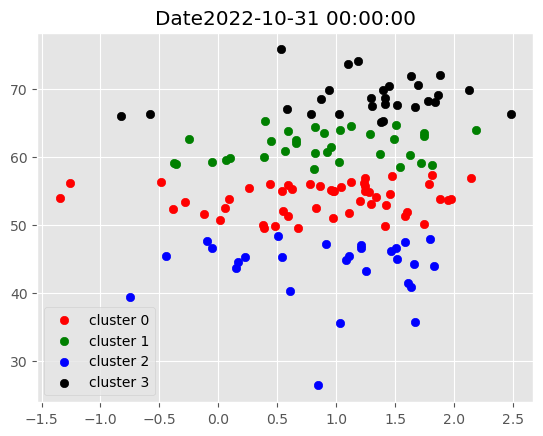

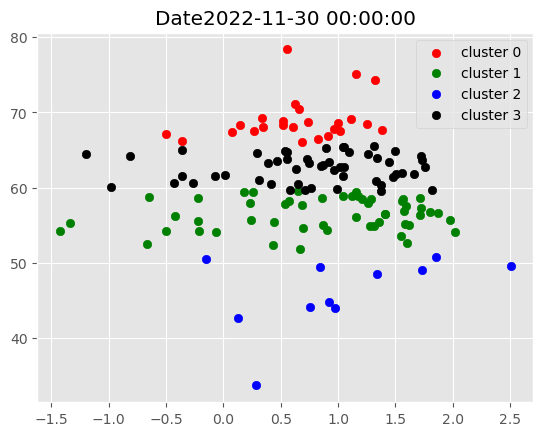

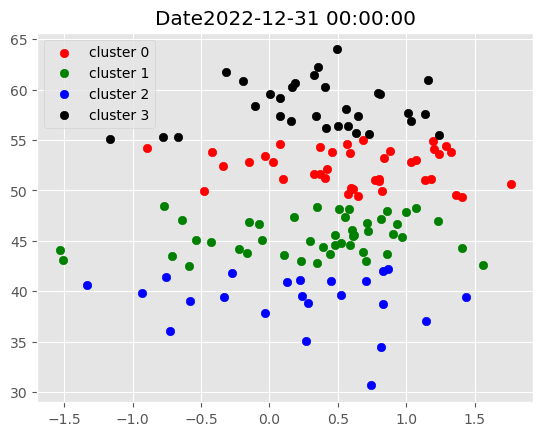

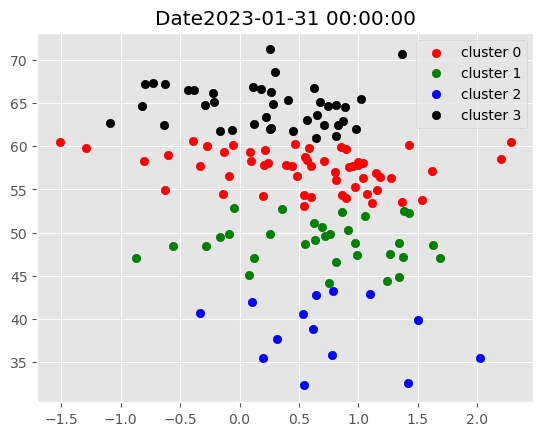

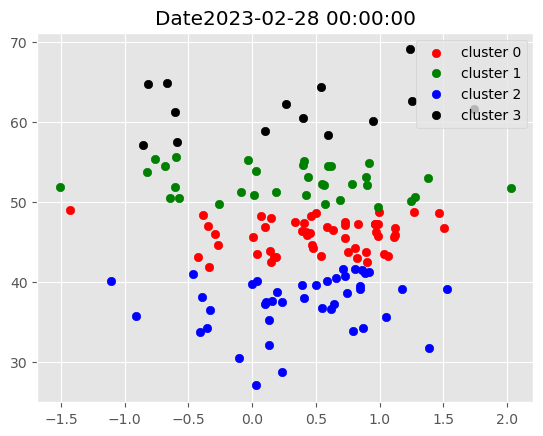

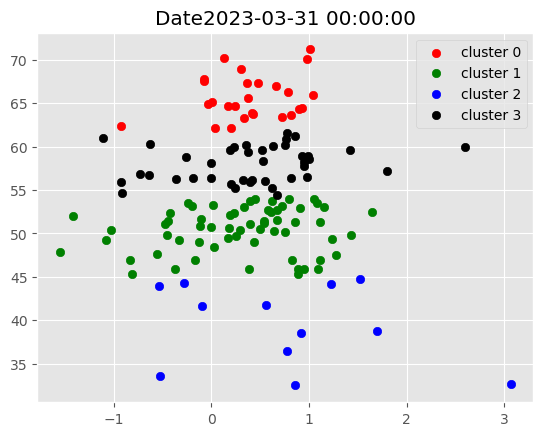

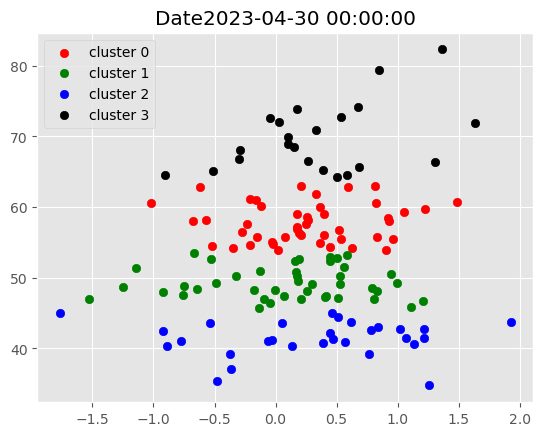

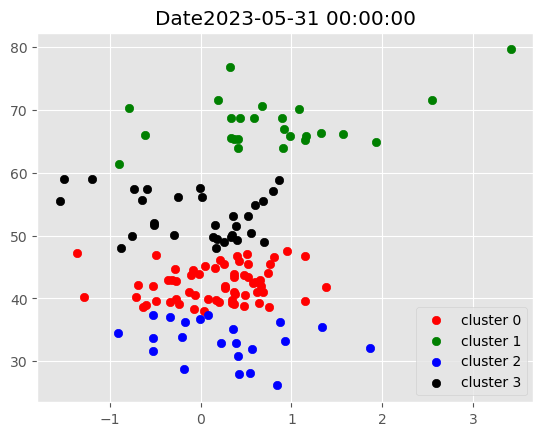

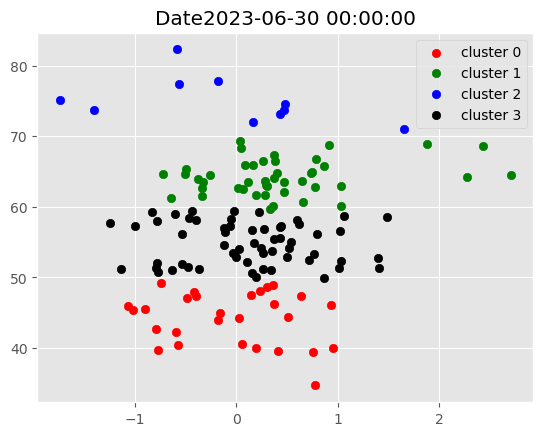

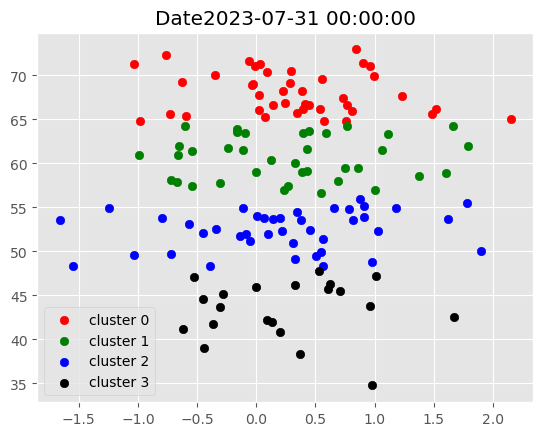

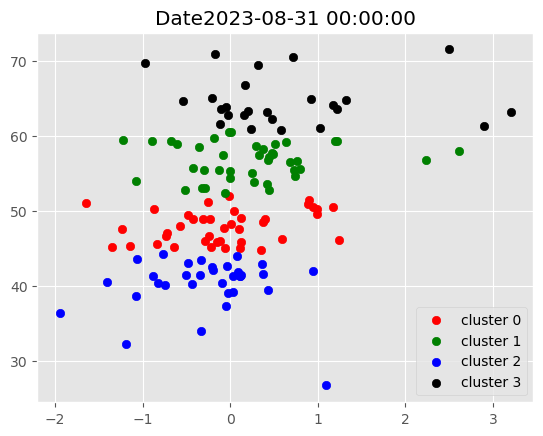

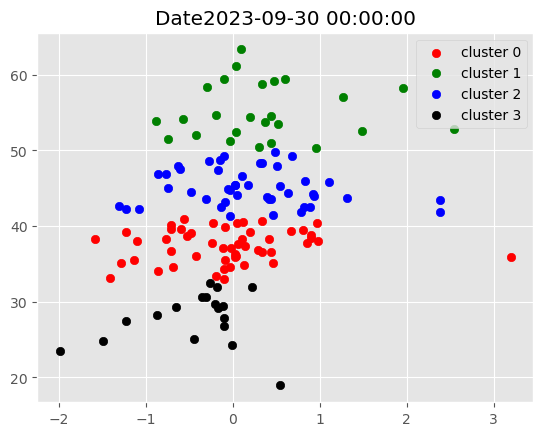

In [756]:
plt.style.use('ggplot')
for i in data.index.get_level_values('date').unique().tolist():
    g = data.xs(i, level=0)
    plt.title(f"Date{i}")
    plot_clusters(g)

In [758]:
#filtered_df =data[data['cluster']==3]
#filtered_df = filtered_df.reset_index(level=1)
#filtered_df.index =  filtered_df.index-pd.DateOffset(1)
#filtered_df = filtered_df.reset_index().set_index(['date','ticker'])
dates = filtered_df.index.get_level_values('date').unique().tolist()
fixed_dates = {}

for d in dates:
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()

fixed_dates

{'2017-11-01': ['AAPL',
  'ACN',
  'ADBE',
  'AMAT',
  'AMZN',
  'AVGO',
  'AXP',
  'BAC',
  'CAT',
  'COP',
  'CRM',
  'CTSH',
  'DE',
  'DHR',
  'DLTR',
  'ELV',
  'EOG',
  'GOOG',
  'GOOGL',
  'INTC',
  'ISRG',
  'JPM',
  'MA',
  'MAR',
  'MCD',
  'MET',
  'META',
  'MMM',
  'MPC',
  'MSFT',
  'MU',
  'NEE',
  'NVDA',
  'NXPI',
  'ORCL',
  'PYPL',
  'SHW',
  'STZ',
  'TXN',
  'UNH',
  'V',
  'VLO',
  'WMT',
  'XOM'],
 '2017-12-01': ['AIG',
  'AMAT',
  'BKNG',
  'CHTR',
  'CTSH',
  'EA',
  'EBAY',
  'EXPE',
  'FCX',
  'GE',
  'HAL',
  'MRK',
  'MU',
  'NFLX',
  'NXPI',
  'PM',
  'REGN',
  'SLB',
  'TSLA',
  'WDC'],
 '2018-01-01': ['AAPL',
  'AIG',
  'AMAT',
  'AMGN',
  'AVGO',
  'BKNG',
  'BMY',
  'CMG',
  'CRM',
  'CTSH',
  'EA',
  'EXPE',
  'GE',
  'GILD',
  'GM',
  'ISRG',
  'LLY',
  'MET',
  'MU',
  'NVDA',
  'ORCL',
  'REGN',
  'TSLA',
  'WDC'],
 '2018-02-01': ['AAL',
  'AMAT',
  'AMGN',
  'AXP',
  'BMY',
  'CL',
  'CMG',
  'CSX',
  'CVS',
  'CVX',
  'DAL',
  'DIS',
  'EXPE',
  

In [1031]:
 filtered_df = data[data['cluster']==3].copy()

filtered_df = filtered_df.reset_index(level=1)

filtered_df.index = filtered_df.index+pd.DateOffset(1)

filtered_df = filtered_df.reset_index().set_index(['date', 'ticker'])

dates = filtered_df.index.get_level_values('date').unique().tolist()

fixed_dates = {}

for d in dates:
    
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()
    
fixed_dates

{'2017-11-01': ['AAPL',
  'ACN',
  'ADBE',
  'AMAT',
  'AMZN',
  'AVGO',
  'AXP',
  'BAC',
  'CAT',
  'COP',
  'CRM',
  'CTSH',
  'DE',
  'DHR',
  'DLTR',
  'ELV',
  'EOG',
  'GOOG',
  'GOOGL',
  'INTC',
  'ISRG',
  'JPM',
  'MA',
  'MAR',
  'MCD',
  'MET',
  'META',
  'MMM',
  'MPC',
  'MSFT',
  'MU',
  'NEE',
  'NVDA',
  'NXPI',
  'ORCL',
  'PYPL',
  'SHW',
  'STZ',
  'TXN',
  'UNH',
  'V',
  'VLO',
  'WMT',
  'XOM'],
 '2017-12-01': ['AIG',
  'AMAT',
  'BKNG',
  'CHTR',
  'CTSH',
  'EA',
  'EBAY',
  'EXPE',
  'FCX',
  'GE',
  'HAL',
  'MRK',
  'MU',
  'NFLX',
  'NXPI',
  'PM',
  'REGN',
  'SLB',
  'TSLA',
  'WDC'],
 '2018-01-01': ['AAPL',
  'AIG',
  'AMAT',
  'AMGN',
  'AVGO',
  'BKNG',
  'BMY',
  'CMG',
  'CRM',
  'CTSH',
  'EA',
  'EXPE',
  'GE',
  'GILD',
  'GM',
  'ISRG',
  'LLY',
  'MET',
  'MU',
  'NVDA',
  'ORCL',
  'REGN',
  'TSLA',
  'WDC'],
 '2018-02-01': ['AAL',
  'AMAT',
  'AMGN',
  'AXP',
  'BMY',
  'CL',
  'CMG',
  'CSX',
  'CVS',
  'CVX',
  'DAL',
  'DIS',
  'EXPE',
  

In [1033]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

def optimize_weights(prices, lower_bound=0):
    returns = expected_returns.mean_historical_return(prices=prices,
                                                      frequency=252)
    cov = risk_models.sample_cov(prices=prices,
                                 frequency=252)
    ef = EfficientFrontier(expected_returns=returns,
                          cov_matrix=cov,
                          weight_bounds=(lower_bound,.1),
                          solver='SCS')
    weights = ef.max_sharpe()
    return ef.clean_weights()

In [605]:
!pip install PyPortfolioOpt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.4/142.4 kB 4.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 36.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.6/237.6 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 14.4 MB/s eta 0:00:00
  Created wheel for ecos: filename=ecos-2.0.14-cp312-cp312-macosx_11_0_arm64.whl size=72739 sha256=9f25386c7ccc2a460b0175e71ee691522de787b5d27fc240a462734f6511d3fd
  Stored in directory: /Users/farhanrashid/Library/Caches/pip/wheels/b8/d9/1e/77a592ed2465d4dde07f30f787f9d43834c0fd7a1467371694
Su

In [1035]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

def optimize_weights(prices, lower_bound=0):
    
    returns = expected_returns.mean_historical_return(prices=prices,
                                                      frequency=252)
    
    cov = risk_models.sample_cov(prices=prices,
                                 frequency=252)
    
    ef = EfficientFrontier(expected_returns=returns,
                           cov_matrix=cov,
                           weight_bounds=(lower_bound, .1),
                           solver='SCS')
    
    weights = ef.max_sharpe()
    
    return ef.clean_weights()

In [1037]:

stocks = data.index.get_level_values('ticker').unique().tolist()

new_df = yf.download(tickers=stocks,
                    start=data.index.get_level_values('date').unique()[0]-pd.DateOffset(months=12),
                    end=data.index.get_level_values('date').unique()[-1])
new_df

[*********************100%%**********************]  156 of 156 completed


Price       Adj Close                                                 \
Ticker            AAL        AAPL        ABBV        ABT         ACN   
Date                                                                   
2016-10-31  39.134331   26.182177   39.878788  34.112480  103.117409   
2016-11-01  38.363209   25.709444   40.357784  33.947311  103.028709   
2016-11-02  38.276455   25.732500   40.600868  33.643051  105.219856   
2016-11-03  38.054199   25.456676   39.957432  33.364857  103.747246   
2016-11-04  38.402084   25.227222   40.064671  33.982082  103.995636   
...               ...         ...         ...        ...         ...   
2023-09-25  12.910000  175.183563  148.897156  95.484749  311.950897   
2023-09-26  12.700000  171.084534  148.184677  94.269997  305.672363   
2023-09-27  12.610000  169.562317  147.433685  93.584259  309.382416   
2023-09-28  12.920000  169.821014  146.586426  96.121506  295.988770   
2023-09-29  12.810000  170.338379  143.515076  94.877380  302.227966   

Price                                                                  ...  \
Ticker            ADBE         ADP        ADSK        AIG        AMAT  ...   
Date                                                                   ...   
2016-10-31  107.510002   73.831528   72.279999  50.462055   26.606327  ...   
2016-11-01  106.870003   73.712784   70.099998  49.627838   26.441637  ...   
2016-11-02  105.889999   76.307861   68.680000  49.521507   26.158005  ...   
2016-11-03  107.169998   75.756607   67.610001  47.558643   25.865229  ...   
2016-11-04  106.199997   75.544586   69.440002  46.928883   25.819481  ...   
...                ...         ...         ...        ...         ...  ...   
2023-09-25  511.600006  235.844101  205.669998  61.170822  135.818924  ...   
2023-09-26  506.299988  233.112457  201.660004  60.314251  133.323090  ...   
2023-09-27  502.600006  238.408676  202.279999  60.068115  134.297577  ...   
2023-09-28  504.670013  239.076828  207.889999  60.333946  137.439713  ...   
2023-09-29  509.899994  236.394348  206.910004  59.664444  137.668427  ...   

Price         Volume                                                           \
Ticker             V      VLO     VRTX        VZ       WBA      WDC       WFC   
Date                                                                            
2016-10-31  10024000  4969500  1928200  12459400   4662100  3363200  20115900   
2016-11-01  10881500  7816800  2458200  13229400   5130800  3821100  20020200   
2016-11-02   9170900  7317600  2580400  16488200   9783100  4216200  19566600   
2016-11-03   7563100  3855900  2371000  12605100   4586500  3192600  14982700   
2016-11-04   7588100  3729900  1902100  14410200   7023900  2705600  27391600   
...              ...      ...      ...       ...       ...      ...       ...   
2023-09-25   5921600  3241900   698100  17616900   6891000  2685900  10624000   
2023-09-26   6193200  4936800   633600  18841600   7570500  3571100  15219400   
2023-09-27   6006700  3644000   860600  22083500  10182900  2547800  11815500   
2023-09-28   4203900  3587300   578900  18772100   7291500  3282000  12454600   
2023-09-29   6044200  4302200   896800  19759400  25659100  2512000  13119100   

Price                                    
Ticker           WMT     WYNN       XOM  
Date                                     
2016-10-31  19167000  1341600  16663800  
2016-11-01  26515800  3722300  13050600  
2016-11-02  22935900  2542400  11226100  
2016-11-03  20411700  9050400   8836500  
2016-11-04  21786300  3223800  13877100  
...              ...      ...       ...  
2023-09-25  10459500  1387800  11316000  
2023-09-26  14435700  1454000  11805400  
2023-09-27  15711000  2050000  23976200  
2023-09-28  11617200  1290400  16808100  
2023-09-29  18842400  1326800  18810700  

[1740 rows x 936 columns]

Timestamp('2016-10-31 00:00:00')

In [1039]:
returns_dataframe = np.log(new_df['Adj Close']).diff()
portfolio_df = pd.DataFrame()
for start_date in fixed_dates.keys():
    try:
        end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')
        cols = fixed_dates[start_date]
        #print(cols)
    
        optimization_start_date = (pd.to_datetime(start_date)-pd.DateOffset(months=12)).strftime('%Y-%m-%d')
        optimization_end_date = (pd.to_datetime(start_date)-pd.DateOffset(days=1)).strftime('%Y-%m-%d')
        #optimization_df = new_df[optimization_start_date:optimization_end_date]['Adj Close'][cols]
        optimization_df = new_df.loc[optimization_start_date:optimization_end_date, ('Adj Close', cols)]
        optimization_df.columns = optimization_df.columns.droplevel(0)
        sucess = False
        try:
            weights = optimize_weights(prices=optimization_df, lower_bound=round(1/(len(optimization_df.columns)*2), 3))
        
            weights = pd.DataFrame(weights, index=pd.Series(0))
            sucess=True
        except:
            print(f'Max Sharpe Optimization failed for {start_date}, Continuing with Equal-Weights')
        
        if sucess==False:
            weights = pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))],
                                    index=optimization_df.columns.tolist(),
                                    columns=pd.Series(0)).T
        temp_df = returns_dataframe[start_date: end_date]
        temp_df.stack().to_frame('return').reset_index(level=0)\
           .merge(weights.stack().to_frame('weights').reset_index(level=0, drop=True),
                  left_index=True,
                  right_index=True)\
           .reset_index().set_index(['Date', 'Ticker']).unstack().stack()
    
        temp_df.index.names = ['date', 'ticker']
        
        temp_df['weighted_return'] = temp_df['return']*temp_df['weights']
    
    
        temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')
        portfolio_df = pd.concat([portfolio_df, temp_df],axis=0)
    except Exception as e:
        print(e)
        
        


portfolio_df









    #print(optimization_df)
    

    #print(start_date)
    #print(end_date)
    #print(cols)
    #print(optimization_start_date)
    #print(optimization_end_date)






#returns_dataframe



Length of new names must be 1, got 2
Length of new names must be 1, got 2
Length of new names must be 1, got 2
Length of new names must be 1, got 2
Length of new names must be 1, got 2
Length of new names must be 1, got 2
Length of new names must be 1, got 2
Length of new names must be 1, got 2
Length of new names must be 1, got 2
Length of new names must be 1, got 2
Length of new names must be 1, got 2
Length of new names must be 1, got 2
Length of new names must be 1, got 2
Length of new names must be 1, got 2
Length of new names must be 1, got 2
Length of new names must be 1, got 2
Length of new names must be 1, got 2
Length of new names must be 1, got 2
Length of new names must be 1, got 2
Length of new names must be 1, got 2
Length of new names must be 1, got 2
Length of new names must be 1, got 2
Length of new names must be 1, got 2
Length of new names must be 1, got 2
Length of new names must be 1, got 2
Length of new names must be 1, got 2
Length of new names must be 1, got 2
L

Empty DataFrame
Columns: []
Index: []

In [1041]:
pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))],
            index=optimization_df.columns.tolist(),
            columns=pd.Series(0)).T






AAL       ABT       AMT        BA       DAL        DG        EL  \
0  0.055556  0.055556  0.055556  0.055556  0.055556  0.055556  0.055556   

         FI        KO       LMT       LUV       MCD       NKE       PFE  \
0  0.055556  0.055556  0.055556  0.055556  0.055556  0.055556  0.055556   

        RTX       TGT       UAL       UPS  
0  0.055556  0.055556  0.055556  0.055556

In [1043]:
[1/len(optimization_df.columns) for i in range(len(optimization_df.columns))]

[0.05555555555555555,
 0.05555555555555555,
 0.05555555555555555,
 0.05555555555555555,
 0.05555555555555555,
 0.05555555555555555,
 0.05555555555555555,
 0.05555555555555555,
 0.05555555555555555,
 0.05555555555555555,
 0.05555555555555555,
 0.05555555555555555,
 0.05555555555555555,
 0.05555555555555555,
 0.05555555555555555,
 0.05555555555555555,
 0.05555555555555555,
 0.05555555555555555]

In [988]:
portfolio_df.plot()

TypeError: no numeric data to plot

In [1045]:
returns_dataframe = np.log(new_df['Adj Close']).diff()
portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():
    try:
        end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')
        cols = fixed_dates[start_date]
        
        optimization_start_date = (pd.to_datetime(start_date)-pd.DateOffset(months=12)).strftime('%Y-%m-%d')
        optimization_end_date = (pd.to_datetime(start_date)-pd.DateOffset(days=1)).strftime('%Y-%m-%d')
        optimization_df = new_df.loc[optimization_start_date:optimization_end_date, ('Adj Close', cols)]
        optimization_df.columns = optimization_df.columns.droplevel(0)
        
        success = False
        try:
            weights = optimize_weights(prices=optimization_df, lower_bound=round(1/(len(optimization_df.columns)*2), 3))
            weights = pd.DataFrame(weights, index=pd.Series(0))
            success = True
        except:
            print(f'Max Sharpe Optimization failed for {start_date}, Continuing with Equal-Weights')
        
        if not success:
            weights = pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))],
                                   index=optimization_df.columns.tolist(),
                                   columns=pd.Series(0)).T
        
        temp_df = returns_dataframe[start_date:end_date]
        temp_df = temp_df.stack().to_frame('return').reset_index(level=0)
        temp_df = temp_df.merge(weights.stack().to_frame('weights').reset_index(level=0, drop=True),
                                left_index=True, right_index=True)
        temp_df = temp_df.reset_index().set_index(['Date', 'Ticker']).unstack().stack()
        
        temp_df.index.names = ['date', 'ticker']
        temp_df['weighted_return'] = temp_df['return'] * temp_df['weights']
        
        # Ensure 'weighted_return' is numeric
        temp_df['weighted_return'] = pd.to_numeric(temp_df['weighted_return'], errors='coerce')
        
        temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')
        portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)
    except Exception as e:
        print(e)

portfolio_df = portfolio_df.drop_duplicates()

# Check if the data is numeric
print(portfolio_df.dtypes)

# Now you should be able to plot if the data is numeric
#portfolio_df.plot()
portfolio_df

Max Sharpe Optimization failed for 2020-04-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2020-05-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2021-02-01, Continuing with Equal-Weights
'return'
Strategy Return    float64
dtype: object


Strategy Return
date                       
2017-11-01         0.001481
2017-11-02         0.003027
2017-11-03         0.006364
2017-11-06         0.002789
2017-11-07         0.003079
...                     ...
2023-09-25         0.003690
2023-09-26        -0.011907
2023-09-27         0.005070
2023-09-28         0.008084
2023-09-29        -0.007685

[1487 rows x 1 columns]

In [1047]:
spy = yf.download(tickers='SPY',
                  start= '2015-01-01',
                  end=dt.date.today())
spy
spy_ret = np.log(spy[['Adj Close']]).diff().dropna().rename({'Adj Close':'SPY Buy&Hold'}, axis=1)
portfolio_df = portfolio_df.merge(spy_ret,
                                 left_index=True,
                                 right_index=True)
portfolio_df

[*********************100%%**********************]  1 of 1 completed


Strategy Return  SPY Buy&Hold
2017-11-01         0.001481      0.001321
2017-11-02         0.003027      0.000388
2017-11-03         0.006364      0.003333
2017-11-06         0.002789      0.001547
2017-11-07         0.003079     -0.000696
...                     ...           ...
2023-09-25         0.003690      0.004196
2023-09-26        -0.011907     -0.014800
2023-09-27         0.005070      0.000399
2023-09-28         0.008084      0.005781
2023-09-29        -0.007685     -0.002430

[1487 rows x 2 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

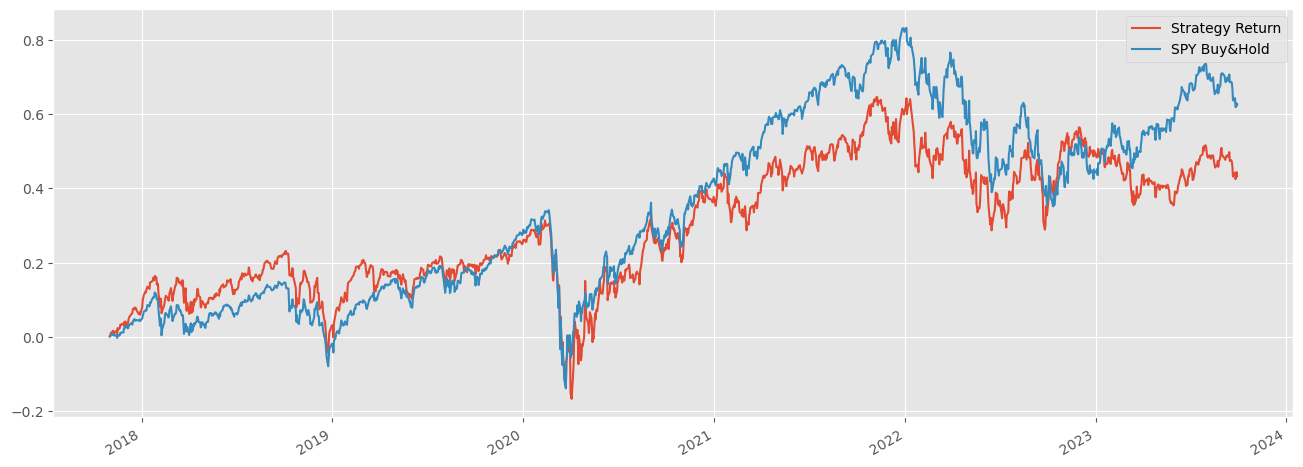

In [1049]:
plt.style.use('ggplot')

portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum())-1
portfolio_cumulative_return[:'2023-09-29'].plot(figsize=(16,6))
plt.show

In [922]:
weights

AAL    ABT    AMT   BA  DAL     DG     EL   FI     KO      LMT    LUV  \
0  0.028  0.028  0.028  0.1  0.1  0.028  0.028  0.1  0.028  0.09203  0.028   

   MCD  NKE    PFE    RTX    TGT  UAL    UPS  
0  0.1  0.1  0.028  0.028  0.028  0.1  0.028

In [924]:
optimization_df = new_df.loc[optimization_start_date:optimization_end_date, ('Adj Close', cols)]

# Remove 'Adj Close' level
optimization_df.columns = optimization_df.columns.droplevel(0)

# Now proceed with the weights optimization
weights = optimize_weights(prices=optimization_df, lower_bound=round(1/(len(optimization_df.columns)*2), 3))
weights

OrderedDict([('AAL', 0.028),
             ('ABT', 0.028),
             ('AMT', 0.028),
             ('BA', 0.1),
             ('DAL', 0.1),
             ('DG', 0.028),
             ('EL', 0.028),
             ('FI', 0.1),
             ('KO', 0.028),
             ('LMT', 0.09203),
             ('LUV', 0.028),
             ('MCD', 0.1),
             ('NKE', 0.1),
             ('PFE', 0.028),
             ('RTX', 0.028),
             ('TGT', 0.028),
             ('UAL', 0.1),
             ('UPS', 0.028)])

In [926]:
weights = pd.DataFrame(weights, index=pd.Series(0))
weights

AAL    ABT    AMT   BA  DAL     DG     EL   FI     KO      LMT    LUV  \
0  0.028  0.028  0.028  0.1  0.1  0.028  0.028  0.1  0.028  0.09203  0.028   

   MCD  NKE    PFE    RTX    TGT  UAL    UPS  
0  0.1  0.1  0.028  0.028  0.028  0.1  0.028

In [928]:
temp_df = returns_dataframe['2017-11-01': '2017-11-30']
temp_df

Ticker           AAL      AAPL      ABBV       ABT       ACN      ADBE  \
Date                                                                     
2017-11-01  0.021552 -0.012800  0.023976 -0.004250  0.004206  0.006204   
2017-11-02 -0.010084  0.007283 -0.015481  0.006828  0.003282  0.026262   
2017-11-03  0.001899  0.025779  0.014073  0.020030  0.004244  0.007488   
2017-11-06  0.001264  0.010094  0.007017 -0.008327 -0.000764 -0.008262   
2017-11-07 -0.022348  0.003209  0.010700  0.002723 -0.002992  0.000442   
2017-11-08 -0.001939  0.008147  0.018453  0.001631  0.009640  0.017428   
2017-11-09 -0.013024 -0.002045  0.001879  0.003613 -0.007342 -0.011695   
2017-11-10  0.003279 -0.003315 -0.004809 -0.011792  0.000417 -0.001100   
2017-11-13 -0.001747 -0.004015 -0.003253  0.009083  0.000209  0.000715   
2017-11-14  0.001529 -0.015233 -0.003898 -0.005258  0.007201 -0.002919   
2017-11-15  0.029680 -0.013278 -0.010503 -0.003278 -0.004841 -0.006862   
2017-11-16  0.010330  0.011876  0.007544  0.012866  0.019087  0.012252   
2017-11-17 -0.006101 -0.005568 -0.009145  0.000360 -0.010872 -0.000329   
2017-11-20  0.006310 -0.001000 -0.000107 -0.004872  0.007671  0.000549   
2017-11-21  0.019930  0.018420  0.011472  0.014900  0.009777  0.009878   
2017-11-22  0.000206  0.010457 -0.002221 -0.005718 -0.006099 -0.006811   
2017-11-24 -0.002057  0.000057  0.002643  0.005896  0.003529  0.008493   
2017-11-27 -0.002887 -0.005042  0.007363  0.000356 -0.000881  0.002923   
2017-11-28  0.016387 -0.005876  0.000000 -0.002318  0.003654  0.002160   
2017-11-29  0.000609 -0.020962  0.004183 -0.007885 -0.007390 -0.047214   
2017-11-30  0.024866  0.013887  0.011414  0.014114  0.007187  0.025788   

Ticker           ADP      ADSK       AIG      AMAT  ...         V       VLO  \
Date                                                ...                       
2017-11-01 -0.007425 -0.001442  0.000774 -0.012841  ...  0.009862  0.022808   
2017-11-02 -0.009228 -0.000481  0.004937  0.009824  ... -0.000811  0.010844   
2017-11-03 -0.018537  0.001042 -0.046945  0.005142  ...  0.003418 -0.008740   
2017-11-06 -0.008141 -0.008284  0.007872 -0.003898  ...  0.005016  0.007023   
2017-11-07  0.012674 -0.003398 -0.005778  0.002482  ...  0.001518  0.004655   
2017-11-08 -0.001420  0.003559 -0.007431  0.007937  ...  0.003384 -0.001958   
2017-11-09 -0.005522 -0.011696  0.009200 -0.025624  ... -0.002938 -0.004787   
2017-11-10 -0.007890  0.005784 -0.002896  0.015737  ... -0.002321  0.001106   
2017-11-13  0.003953  0.012351 -0.000967  0.011818  ... -0.004299 -0.008639   
2017-11-14  0.004920 -0.006197 -0.008748 -0.010754  ...  0.005193  0.008639   
2017-11-15 -0.012751  0.001210 -0.005220 -0.011588  ... -0.015570  0.001351   
2017-11-16  0.003338  0.023744 -0.017822  0.036444  ...  0.008730  0.007824   
2017-11-17  0.000270  0.003851  0.000000 -0.023617  ... -0.010868  0.009212   
2017-11-20 -0.004784 -0.009536 -0.006180  0.019806  ...  0.001183 -0.001095   
2017-11-21  0.000272  0.011260 -0.001006  0.020272  ...  0.013550  0.020617   
2017-11-22 -0.003171  0.000470 -0.006731 -0.017529  ... -0.005669 -0.017455   
2017-11-24 -0.001725  0.013449 -0.003383  0.003980  ...  0.010324 -0.001215   
2017-11-27  0.001090  0.005698 -0.004584 -0.016892  ...  0.003655 -0.001582   
2017-11-28  0.009758 -0.002229  0.017879  0.006826  ...  0.008682  0.013546   
2017-11-29  0.018794 -0.172687  0.007992 -0.080232  ... -0.031362  0.001201   
2017-11-30  0.009921  0.003287 -0.005654 -0.002650  ...  0.024546  0.026990   

Ticker          VRTX        VZ       WBA       WDC       WFC       WMT  \
Date                                                                     
2017-11-01 -0.024927 -0.000836  0.011105 -0.000336  0.001246  0.007190   
2017-11-02  0.015790 -0.007766 -0.003438 -0.007198  0.011755  0.009732   
2017-11-03  0.034391 -0.000843  0.001347 -0.018109 -0.002304  0.009861   
2017-11-06 -0.006623 -0.040673 -0.014005  0.009608 -0.003021 -0.010988   
2017-11-07  0.015519  0.000878  0.0

In [930]:
temp_df.stack().to_frame('return').reset_index(level=0)\
       .merge(weights.stack().to_frame('weights').reset_index(level=0, drop=True),
              left_index=True,
              right_index=True)\
       .reset_index().set_index(['Date', 'Ticker']).unstack().stack()

return  weights
Date       Ticker                   
2017-11-01 AAL     0.021552    0.028
           ABT    -0.004250    0.028
           AMT    -0.020108    0.028
           BA      0.002013    0.100
           DAL     0.006376    0.100
...                     ...      ...
2017-11-30 PFE     0.001380    0.028
           RTX     0.027463    0.028
           TGT    -0.029283    0.028
           UAL     0.019616    0.100
           UPS     0.020043    0.028

[378 rows x 2 columns]

In [932]:
weights.stack().to_frame('weights').reset_index(level=0, drop=True)

weights
AAL  0.02800
ABT  0.02800
AMT  0.02800
BA   0.10000
DAL  0.10000
DG   0.02800
EL   0.02800
FI   0.10000
KO   0.02800
LMT  0.09203
LUV  0.02800
MCD  0.10000
NKE  0.10000
PFE  0.02800
RTX  0.02800
TGT  0.02800
UAL  0.10000
UPS  0.02800

In [934]:
# First, stack temp_df and convert it to a DataFrame
temp_df = temp_df.stack().to_frame('return').reset_index(level=0)

# Merge with weights
temp_df = temp_df.merge(weights.stack().to_frame('weights').reset_index(level=0, drop=True),
                        left_index=True,
                        right_index=True)

# If there's an extra 'Ticker' column, drop it
if 'Ticker' in temp_df.columns:
    temp_df = temp_df.drop(columns=['Ticker'])

# Now proceed with resetting index and setting the index
# Adjusted to use existing columns 'Date' and 'Ticker' instead of 'index'
temp_df = temp_df.reset_index().set_index(['Date', 'Ticker']).unstack().stack()



In [936]:
temp_df.index.names = ['date', 'ticker']
temp_df

return  weights
date       ticker                   
2017-11-01 AAL     0.021552    0.028
           ABT    -0.004250    0.028
           AMT    -0.020108    0.028
           BA      0.002013    0.100
           DAL     0.006376    0.100
...                     ...      ...
2017-11-30 PFE     0.001380    0.028
           RTX     0.027463    0.028
           TGT    -0.029283    0.028
           UAL     0.019616    0.100
           UPS     0.020043    0.028

[378 rows x 2 columns]

In [942]:
temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')

Strategy Return
date                       
2017-11-01         0.000023
2017-11-02         0.005198
2017-11-03         0.003874
2017-11-06         0.003650
2017-11-07        -0.004252
2017-11-08         0.003992
2017-11-09        -0.005512
2017-11-10        -0.001013
2017-11-13         0.000767
2017-11-14         0.001533
2017-11-15        -0.002791
2017-11-16         0.011038
2017-11-17        -0.002455
2017-11-20         0.003817
2017-11-21         0.007722
2017-11-22        -0.002730
2017-11-24        -0.000246
2017-11-27        -0.001010
2017-11-28         0.009575
2017-11-29         0.012318
2017-11-30         0.012494

In [940]:
temp_df['weighted_return'] = temp_df['return']*temp_df['weights']
temp_df

return  weights  weighted_return
date       ticker                                    
2017-11-01 AAL     0.021552    0.028         0.000603
           ABT    -0.004250    0.028        -0.000119
           AMT    -0.020108    0.028        -0.000563
           BA      0.002013    0.100         0.000201
           DAL     0.006376    0.100         0.000638
...                     ...      ...              ...
2017-11-30 PFE     0.001380    0.028         0.000039
           RTX     0.027463    0.028         0.000769
           TGT    -0.029283    0.028        -0.000820
           UAL     0.019616    0.100         0.001962
           UPS     0.020043    0.028         0.000561

[378 rows x 3 columns]

In [798]:
weights = optimize_weights(prices=optimization_df,
                           lower_bound=round(1/(len(optimization_df.columns)*2),3))
weights

OrderedDict([(('Adj Close', 'AAPL'), 0.011),
             (('Adj Close', 'ACN'), 0.011),
             (('Adj Close', 'ADBE'), 0.011),
             (('Adj Close', 'AMAT'), 0.011),
             (('Adj Close', 'AMZN'), 0.011),
             (('Adj Close', 'AVGO'), 0.011),
             (('Adj Close', 'AXP'), 0.011),
             (('Adj Close', 'BAC'), 0.011),
             (('Adj Close', 'CAT'), 0.011),
             (('Adj Close', 'COP'), 0.011),
             (('Adj Close', 'CRM'), 0.011),
             (('Adj Close', 'CTSH'), 0.011),
             (('Adj Close', 'DE'), 0.011),
             (('Adj Close', 'DHR'), 0.011),
             (('Adj Close', 'DLTR'), 0.011),
             (('Adj Close', 'ELV'), 0.1),
             (('Adj Close', 'EOG'), 0.011),
             (('Adj Close', 'GOOG'), 0.011),
             (('Adj Close', 'GOOGL'), 0.011),
             (('Adj Close', 'INTC'), 0.011),
             (('Adj Close', 'ISRG'), 0.06281),
             (('Adj Close', 'JPM'), 0.011),
             (('Adj C

In [806]:
optimization_df = optimization_df = new_df.loc[optimization_start_date:optimization_end_date, ('Adj Close', cols)]
len(optimization_df.columns)

18

In [774]:
optimization_df = new_df.loc[optimization_start_date:optimization_end_date, ('Adj Close', cols)]
print(optimization_df)


Price      Adj Close                                                \
Ticker           AAL        ABT         AMT          BA        DAL   
Date                                                                 
2022-10-03     11.92  95.658646  203.428635  126.050003  27.904684   
2022-10-04     12.95  99.080521  206.154510  133.509995  30.363375   
2022-10-05     12.87  99.368889  200.590363  132.110001  30.136269   
2022-10-06     12.73  98.474968  190.220825  132.199997  30.235010   
2022-10-07     12.18  97.840576  183.644226  129.789993  29.020475   
...              ...        ...         ...         ...        ...   
2023-09-25     12.91  95.484749  159.995926  198.779999  37.165653   
2023-09-26     12.70  94.269997  157.283005  195.639999  36.383949   
2023-09-27     12.61  93.584259  154.174210  195.460007  36.275105   
2023-09-28     12.92  96.121506  156.713364  190.429993  36.562057   
2023-09-29     12.81  94.877373  158.769806  191.679993  36.611530   

Price              